# Импорт библиотек и загрузка данных


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from scipy.stats import shapiro, spearmanr, kruskal
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Climat.csv', sep=';', decimal='.', skipinitialspace=True)
df.head()

,Год,Время года,Климат,Город,Страна,Способ охлаждения,Режим при смешанном типе охлаждения,Способ обогрева,Возраст,Пол,Ощущение температуры,Ощущение температуры (bool),Предпочтительное изменение температуры,Ощущение движения воздуха (bool),Предпочтительное изменение движения воздуха,Оценка комфорта,Утепление,Температура воздуха в помещении,Температура воздуха на улице,RH,Скорость воздуха,Рост,Вес,Занавески,Вентилятор,Окно,Двери,Отопление,Среднемесячная температура на улице,Количество рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,0.0,1.0,Без изменений,NaN,Без изменений,3.5,0.54,22.9,22.8,48.9,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,-2.0,1.0,Без изменений,NaN,Без изменений,6.0,0.61,74.8,23.7,39.2,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,1.0,1.0,Без изменений,NaN,Без изменений,5.0,0.57,25.6,24.5,34.7,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,-0.5,0.0,Теплее,NaN,Без изменений,2.5,0.61,24.2,23.8,50.0,27.16,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,0.0,1.0,Без изменений,NaN,Меньше,4.5,0.57,23.8,24.1,35.8,63.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0


# Первичная предобработка и быстрый обзор данных


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

bool_cols = ['ощущение_температуры_(bool)', 'ощущение_движения_воздуха_(bool)',
            'занавески', 'вентилятор', 'окно', 'двери', 'отопление']

In [4]:
df[bool_cols].head()

,ощущение_температуры_(bool),ощущение_движения_воздуха_(bool),занавески,вентилятор,окно,двери,отопление
0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
1,1.0,NaN,0.0,0.0,NaN,NaN,NaN
2,1.0,NaN,0.0,0.0,NaN,NaN,NaN
3,0.0,NaN,1.0,1.0,NaN,NaN,NaN
4,1.0,NaN,1.0,1.0,NaN,NaN,NaN


В булевых колонках значение 1 означает, "активное" состояние(двери открыты, вентилятор включен и тд.), значение 0 - "неактивное" (двери закрыты, вентилятор выключен и тд.).

In [5]:
df[bool_cols] = df[bool_cols].fillna(False).astype('bool')

In [6]:
df[bool_cols].head()

,ощущение_температуры_(bool),ощущение_движения_воздуха_(bool),занавески,вентилятор,окно,двери,отопление
0,True,False,True,True,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,False,False,True,True,False,False,False
4,True,False,True,True,False,False,False


In [7]:
df.shape

(484, 30)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   год                                          484 non-null    float64
 1   время_года                                   484 non-null    object 
 2   климат                                       484 non-null    object 
 3   город                                        484 non-null    object 
 4   страна                                       484 non-null    object 
 5   способ_охлаждения                            484 non-null    object 
 6   режим_при_смешанном_типе_охлаждения          337 non-null    object 
 7   способ_обогрева                              222 non-null    object 
 8   возраст                                      413 non-null    float64
 9   пол                                          412 non-null    object 
 10  ощ

In [9]:
df.describe()

,год,возраст,ощущение_температуры,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,среднемесячная_температура_на_улице,количество_рекламаций
count,484.000000,413.000000,484.000000,215.000000,484.000000,484.000000,72.000000,484.000000,484.000000,143.000000,214.000000,484.000000,484.000000
mean,2011.033058,40.634383,0.203306,4.772093,0.634587,26.072107,24.104167,52.973760,0.760558,164.411678,65.471963,27.389669,0.105372
std,0.922988,11.001301,1.091976,1.261161,0.253103,7.681363,0.604546,13.036204,4.921106,21.273235,11.574079,19.469562,0.440276
min,2010.000000,22.000000,-3.000000,1.000000,0.360000,16.200000,22.800000,23.800000,0.000000,5.230000,42.000000,8.500000,0.000000
25%,2010.000000,35.000000,0.000000,4.000000,0.460000,23.800000,23.800000,42.775000,0.060000,160.000000,57.000000,22.000000,0.000000
50%,2011.000000,42.000000,0.000000,5.000000,0.590000,24.600000,24.100000,53.750000,0.100000,165.100000,65.000000,22.000000,0.000000
75%,2012.000000,45.000000,1.000000,6.000000,0.700000,25.900000,24.400000,62.325000,0.140000,172.700000,72.750000,30.800000,0.000000
max,2012.000000,65.000000,3.000000,6.000000,2.080000,77.000000,25.900000,85.100000,63.830000,190.500000,110.000000,328.000000,3.000000


# Выбросы


In [10]:
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [11]:
df['год'].unique() # нет выбросов

array([2011., 2010., 2012.])

In [12]:
outliers(df, 'возраст')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций


<Axes: ylabel='возраст'>

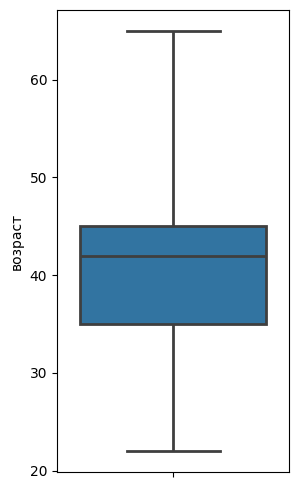

In [13]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['возраст'], linewidth=2, whis=3) #нет выбросов

In [14]:
outliers(df, 'ощущение_температуры')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций


<Axes: ylabel='ощущение_температуры'>

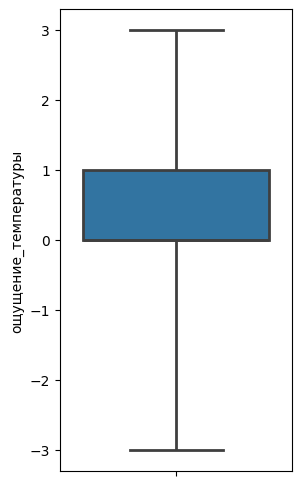

In [15]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['ощущение_температуры'], linewidth=2, whis=3) #нет выбросов

In [16]:
outliers(df, 'оценка_комфорта')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций


<Axes: ylabel='оценка_комфорта'>

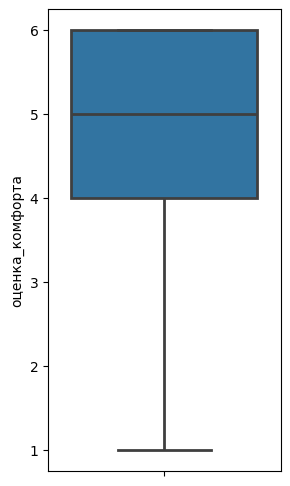

In [17]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['оценка_комфорта'], linewidth=2, whis=3) #нет выбросов

In [18]:
outliers(df, 'утепление')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
275,2012.0,Зима,Субтропическое высокогорье,Шимла,Индия,Вентиляция,NaN,NaN,55.0,Женский,1.0,False,Холоднее,False,Без изменений,6.0,2.06,16.2,NaN,23.8,0.03,160.0,70.0,False,False,False,False,False,8.5,0
284,2012.0,Зима,Субтропическое высокогорье,Шимла,Индия,Смешанный,Кондиционирование,Механическое отопление,55.0,Мужской,-1.0,True,Без изменений,False,Больше,4.0,1.74,22.1,NaN,35.1,0.02,162.6,70.0,False,False,False,False,False,8.5,0
312,2012.0,Зима,Субтропическое высокогорье,Шимла,Индия,Смешанный,Кондиционирование,Механическое отопление,45.0,Мужской,0.0,True,Холоднее,False,Больше,5.0,2.08,20.4,NaN,27.8,0.02,157.5,60.0,False,False,False,False,False,8.5,0
318,2012.0,Зима,Субтропическое высокогорье,Шимла,Индия,Вентиляция,NaN,NaN,55.0,Мужской,0.0,True,Без изменений,False,Без изменений,6.0,1.69,20.0,NaN,39.2,0.07,170.2,82.0,False,False,False,False,False,8.5,0
319,2012.0,Зима,Субтропическое высокогорье,Шимла,Индия,Смешанный,Кондиционирование,Механическое отопление,55.0,Мужской,0.0,True,Без изменений,False,Без изменений,6.0,1.44,19.4,NaN,38.2,0.03,160.0,60.0,False,False,False,False,False,8.5,0
340,2012.0,Зима,Субтропическое высокогорье,Шимла,Индия,Смешанный,Кондиционирование,Механическое отопление,25.0,Женский,-1.0,False,Холоднее,False,Без изменений,4.0,1.48,22.8,NaN,31.2,0.04,134.6,43.0,False,False,False,False,False,8.5,0
345,2012.0,Зима,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,NaN,55.0,Мужской,0.0,True,Без изменений,False,Без изменений,6.0,1.59,17.6,NaN,54.8,0.03,177.8,78.0,False,False,False,False,False,15.5,0
357,2012.0,Зима,Влажный субтропический муссонный,Дели,Индия,Смешанный,Кондиционирование,Механическое отопление,25.0,Мужской,-1.0,False,Холоднее,False,Без изменений,3.0,1.45,17.5,NaN,53.0,0.07,182.9,85.0,False,False,False,False,False,15.5,2
371,2012.0,Зима,Субтропическое высокогорье,Шимла,Индия,Смешанный,Кондиционирование,Механическое отопление,25.0,Мужской,0.0,True,Без изменений,False,Без изменений,6.0,1.68,20.6,NaN,34.6,0.07,190.5,82.0,False,False,False,False,False,8.5,0
373,2012.0,Зима,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,NaN,55.0,Женский,-1.0,True,Холоднее,False,Без изменений,3.0,1.47,18.7,NaN,52.2,0.01,157.5,65.0,False,False,False,False,False,15.5,0


<Axes: ylabel='утепление'>

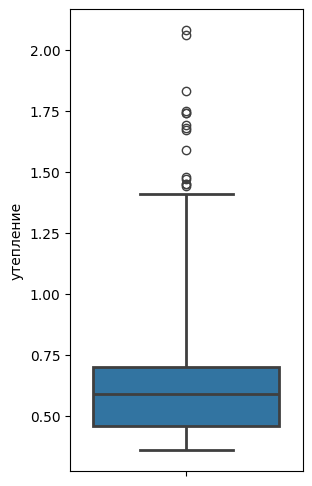

In [19]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['утепление'], linewidth=2, whis=3) # 15 выбросов
# Предполагаю, что утепление показывает насколько теплая одежда у респондента
# Тогда получается, что такие высокие значения утепления объясняются тем, что респонденты находятся в Шимле и Дели зимой, где ввиду климата очень холодные зимы
# Из этого следует, что это не выбросы, а вынужденные меры утепления из-за погоды зимой

In [20]:
outliers(df, 'температура_воздуха_в_помещении')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,74.8,23.7,39.2,0.12,NaN,NaN,False,False,False,False,False,84.0,0
7,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,30.0,NaN,-2.0,True,Теплее,False,Без изменений,4.3,0.61,74.8,23.6,40.0,0.09,NaN,NaN,False,False,False,False,False,32.8,0
9,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,43.0,NaN,1.0,False,Холоднее,False,Больше,4.0,0.61,76.4,24.4,34.5,0.34,NaN,NaN,False,False,False,False,False,31.7,0
23,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,37.0,NaN,1.6,False,Холоднее,False,Больше,2.2,0.57,77.0,24.7,33.3,0.07,NaN,NaN,False,False,False,False,False,32.8,1
33,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,39.0,NaN,-1.0,True,Тепле,False,Меньше,4.0,0.57,74.9,24.2,42.8,0.32,NaN,NaN,True,True,False,False,False,32.8,0
38,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,36.0,NaN,1.0,True,Холоднее,False,Больше,3.0,0.57,75.5,24.3,42.1,0.07,NaN,NaN,False,False,False,False,False,28.9,1
41,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,32.0,NaN,0.0,True,Холоднее,False,Без изменений,5.0,0.61,75.7,24.1,42.6,0.28,NaN,NaN,True,True,False,False,False,31.7,0
45,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,38.0,NaN,-1.0,True,Без изменений,False,Без изменений,5.0,0.61,74.0,23.3,43.9,0.15,NaN,NaN,True,True,False,False,False,31.7,0
54,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,51.0,NaN,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,75.7,24.1,38.5,0.12,NaN,NaN,False,False,False,False,False,28.9,0
67,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,43.0,NaN,-0.5,True,Теплее,False,Меньше,4.0,0.57,74.9,23.8,35.6,0.16,NaN,NaN,True,True,False,False,False,84.0,0


<Axes: ylabel='температура_воздуха_в_помещении'>

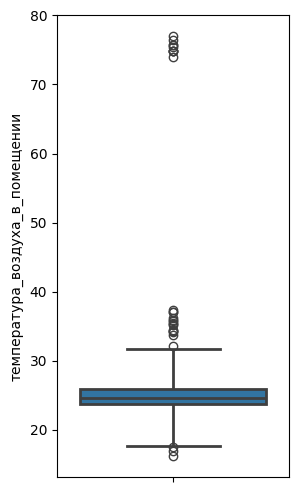

In [21]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['температура_воздуха_в_помещении'], linewidth=2, whis=3)
# Температура выше 70 градусов однозначно выбросы (нереальные для нашей планеты значения), которые могли произойти, например, из-за ошибки оборудования для записи температуры
# Данные значени мы заменим средним значением температуры воздуха в помещении для Техаса

# "Нижние" выбросы объяснимы тем, что эти случаи зафиксированы в Шимле и Дели зимой, где, как говорилось до этого, очень холодные зимы, поэтому в и комнатах такая температура

# "Верхние" выбросы объяснимы временем года и городом записи: летом в Ченнае, Ахмедабаде и Дели, Индия, а в Индии летом жара и высокая влажность

In [22]:
df[df['температура_воздуха_в_помещении'] > 60][['время_года', 'город']]

,время_года,город
1,Лето,Техас
7,Лето,Техас
9,Лето,Техас
23,Лето,Техас
33,Лето,Техас
38,Лето,Техас
41,Лето,Техас
45,Лето,Техас
54,Лето,Техас
67,Лето,Техас


In [23]:
df[(df['температура_воздуха_в_помещении'] > 32) & ( df['температура_воздуха_в_помещении'] < 50)][['время_года', 'город']]

,время_года,город
290,Лето,Ченнай
293,Лето,Ахмедабад
296,Лето,Дели
299,Лето,Ахмедабад
322,Лето,Ахмедабад
328,Весна,Хайдарабад
358,Лето,Ахмедабад
361,Лето,Дели
362,Лето,Дели
365,Лето,Ахмедабад


In [24]:
temp = 'температура_воздуха_в_помещении'
df[temp] = np.where(df[temp] > 70, df[df['город'] == 'Техас'][temp].mean(), df[temp])

In [25]:
outliers(df, 'температура_воздуха_на_улице')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций


<Axes: ylabel='температура_воздуха_на_улице'>

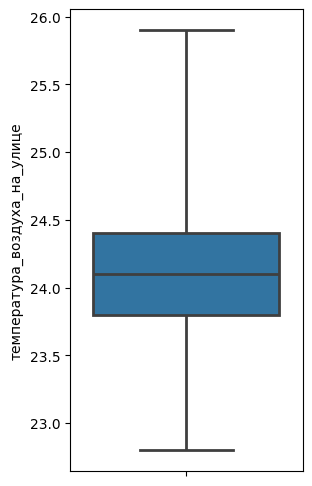

In [26]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['температура_воздуха_на_улице'], linewidth=2, whis=3) # нет выбросов

In [27]:
outliers(df, 'rh')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций


<Axes: ylabel='rh'>

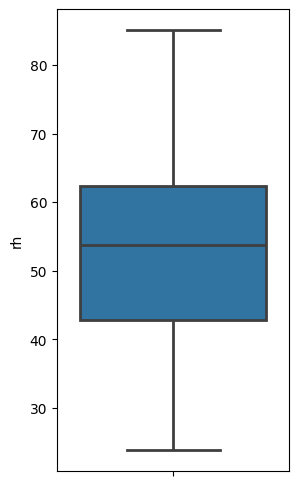

In [28]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['rh'], linewidth=2, whis=3) # нет выбросов

In [29]:
outliers(df, 'скорость_воздуха')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,-0.5,False,Теплее,False,Без изменений,2.5,0.61,24.2,23.8,50.0,27.16,NaN,NaN,True,True,False,False,False,28.9,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,0.0,True,Без изменений,False,Меньше,4.5,0.57,23.8,24.1,35.8,63.83,NaN,NaN,True,True,False,False,False,32.8,0
10,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,30.0,NaN,-1.4,True,Холоднее,False,Больше,5.2,0.57,25.7,24.8,33.1,18.65,NaN,NaN,False,False,False,False,False,32.8,0
26,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,48.0,NaN,-1.0,True,Без изменений,False,Без изменений,5.0,0.61,24.0,23.9,44.1,46.00,NaN,NaN,True,True,False,False,False,31.7,0
28,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,30.0,NaN,-0.5,True,Без изменений,False,Меньше,4.0,0.79,23.9,24.6,40.4,47.97,NaN,NaN,True,True,False,False,False,91.0,3
31,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,0.5,True,Без изменений,False,Без изменений,4.5,0.54,24.1,23.6,37.6,29.61,NaN,NaN,True,True,False,False,False,28.9,0
53,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,34.0,NaN,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,23.9,23.7,39.2,26.49,NaN,NaN,False,False,False,False,False,28.9,0
59,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,34.0,NaN,2.0,False,Холоднее,False,Больше,3.0,0.57,24.5,24.1,34.1,22.68,NaN,NaN,False,False,False,False,False,31.7,1
65,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,52.0,NaN,-1.0,True,Без изменений,False,Без изменений,5.0,0.57,26.9,25.2,33.0,14.85,NaN,NaN,False,False,False,False,False,32.8,0
70,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,0.0,True,Без изменений,False,Без изменений,6.0,0.57,26.3,24.7,34.0,8.20,NaN,NaN,False,False,False,False,False,28.9,0


<Axes: ylabel='скорость_воздуха'>

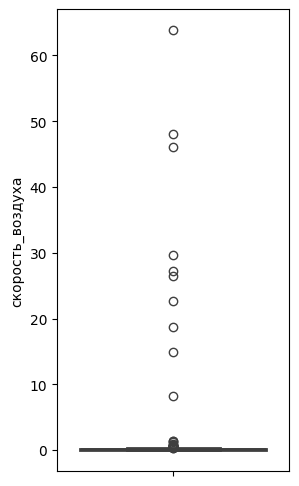

In [30]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['скорость_воздуха'], linewidth=2, whis=3)

# Околонулевые значения не такие уж и выбросы из-за масштаба(раззница между скоростью 0.1 и 0.5 не играет важной роли)
# Значения больше 40 это однозначно выбросы, но значения около 30 и ниже могут быть объяснены частыми ураганами в Техасе, скорость которых составляет до 30 м/c

In [31]:
wind = 'скорость_воздуха'
df[wind] = np.where(df[wind] > 40, df[df['город'] == 'Техас'][wind].mean(), df[wind])

In [32]:
outliers(df, 'рост')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
287,2012.0,Зима,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,NaN,35.0,Мужской,-1.0,True,Холоднее,False,Без изменений,5.0,1.32,18.3,NaN,54.4,0.01,5.23,55.0,False,False,False,False,False,15.5,0
306,2012.0,Лето,Субтропическое высокогорье,Шимла,Индия,Вентиляция,NaN,NaN,45.0,Мужской,0.0,True,Холоднее,False,Больше,5.0,1.19,22.0,NaN,80.6,0.04,5.74,53.0,False,False,True,False,False,18.5,0


<Axes: ylabel='рост'>

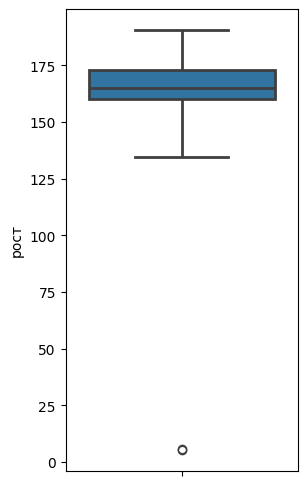

In [33]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['рост'], linewidth=2, whis=3)

# Очевидные выбросы, просто заменим на средний рост мужчин 35-45 лет

In [34]:
df['рост'] = np.where(df['рост'] < 125, df[(df['пол'] == 'Мужской') & ((df['возраст'] == 35) | (df['возраст'] == 45))]['рост'].mean(), df['рост'])

In [35]:
outliers(df, 'вес')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций


<Axes: ylabel='вес'>

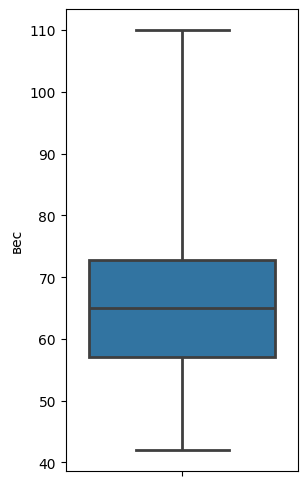

In [36]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['вес'], linewidth=2, whis=3) # нет выбросов

In [37]:
outliers(df, 'среднемесячная_температура_на_улице')

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,31.423611,23.7,39.2,0.120000,NaN,NaN,False,False,False,False,False,84.0,0
11,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,51.0,NaN,-0.5,True,Теплее,False,Без изменений,4.0,0.54,23.700000,24.1,43.7,0.310000,NaN,NaN,True,True,False,False,False,328.0,0
14,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,31.0,NaN,-1.5,False,Теплее,False,Без изменений,2.5,0.54,23.200000,23.0,45.2,0.130000,NaN,NaN,True,True,False,False,False,84.0,1
20,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,41.0,NaN,0.0,True,Без изменений,False,Без изменений,3.5,0.61,23.600000,23.6,41.8,0.170000,NaN,NaN,True,True,False,False,False,91.0,0
28,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,30.0,NaN,-0.5,True,Без изменений,False,Меньше,4.0,0.79,23.900000,24.6,40.4,4.385694,NaN,NaN,True,True,False,False,False,91.0,3
30,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,28.0,NaN,-1.3,True,Холоднее,False,Больше,4.5,0.57,24.300000,24.2,36.8,0.270000,NaN,NaN,False,False,False,False,False,91.0,0
34,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,29.0,NaN,2.0,False,Холоднее,False,Больше,3.0,0.61,24.300000,24.1,35.0,0.170000,NaN,NaN,True,True,False,False,False,89.0,1
39,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,31.0,NaN,2.0,False,Холоднее,False,Больше,3.0,0.57,24.400000,24.4,34.1,0.130000,NaN,NaN,False,False,False,False,False,89.0,1
44,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,25.0,NaN,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,24.000000,23.9,38.4,0.120000,NaN,NaN,False,False,False,False,False,84.0,0
67,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,43.0,NaN,-0.5,True,Теплее,False,Меньше,4.0,0.57,31.423611,23.8,35.6,0.160000,NaN,NaN,True,True,False,False,False,84.0,0


<Axes: ylabel='среднемесячная_температура_на_улице'>

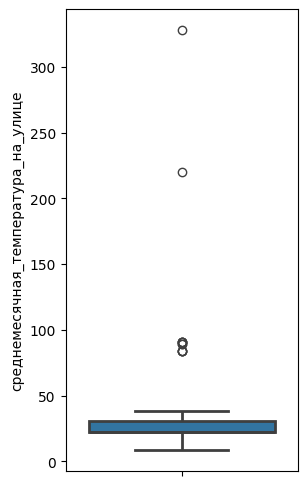

In [38]:
plt.figure(figsize=(3, 6))
sns.boxplot(df['среднемесячная_температура_на_улице'], linewidth=2, whis=3)

# Очередные выбросы, просто заменяем средней температурой по городу

In [39]:
month_temp = 'среднемесячная_температура_на_улице'
df[month_temp] = np.where((df[month_temp] > 40) & (df['город'] == 'Техас'), df[df['город'] == 'Техас'][month_temp].mean(), df[month_temp])
df[month_temp] = np.where((df[month_temp] > 40) & (df['город'] == 'Сидней'), df[df['город'] == 'Сидней'][month_temp].mean(), df[month_temp])

# Пропуски


In [40]:
df.isna().sum()

,0
год,0
время_года,0
климат,0
город,0
страна,0
способ_охлаждения,0
режим_при_смешанном_типе_охлаждения,147
способ_обогрева,262
возраст,71
пол,72


In [41]:
df['режим_при_смешанном_типе_охлаждения'].value_counts()

,count
режим_при_смешанном_типе_охлаждения,
Кондиционирование,237
Вентиляция,100


In [42]:
df['способ_охлаждения'].value_counts()

# Т.к. способом охлаждения был выбран смешанный 337 раз, значит и в сумме в режимах при смешанном типе будет 337
# Значит это не пропуски, а отсутстиве ввиду выбора другого режима, значит заменим пропуски на '-'

,count
способ_охлаждения,
Смешанный,337
Кондиционирование,114
Вентиляция,33


In [43]:
df['режим_при_смешанном_типе_охлаждения'] = df['режим_при_смешанном_типе_охлаждения'].fillna('-')

In [44]:
df['способ_обогрева'].isna().sum()

np.int64(262)

In [45]:
df[df['способ_обогрева'].isna()].groupby('время_года').size()

,0
время_года,
Весна,18
Зима,71
Лето,160
Осень,13


In [46]:
df[df['способ_обогрева'].isna()].groupby('время_года')['температура_воздуха_в_помещении'].agg(['mean', 'median'])

# На основе данных можно сделать вывод, что это не пропуски, а просто отметки, когда отопление не использовалось ввиду и так высокой температуры в помещении
# Значит заменим пропуски на 'Без обогрева'

,mean,median
время_года,,
Весна,27.166667,26.8
Зима,25.273239,25.9
Лето,26.206476,25.1
Осень,26.846154,27.0


In [47]:
df['способ_обогрева'] = df['способ_обогрева'].fillna('Без обогрева')

In [48]:
df3 = df[df['возраст'].isna()]
df3

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
271,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Вентиляция,Без обогрева,NaN,Женский,1.0,False,Холоднее,False,Больше,NaN,0.63,31.7,NaN,40.0,0.01,NaN,52.0,False,False,False,True,False,21.6,0
274,2012.0,Весна,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Мужской,-1.0,True,Теплее,False,Меньше,NaN,0.62,25.8,NaN,56.0,0.29,NaN,83.0,False,False,False,False,False,30.4,0
276,2012.0,Весна,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Мужской,0.0,True,Холоднее,False,Без изменений,NaN,0.68,27.9,NaN,35.0,0.22,NaN,70.0,False,False,False,False,False,31.5,0
280,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Вентиляция,Без обогрева,NaN,Мужской,-1.0,True,Холоднее,False,Больше,NaN,0.72,29.3,NaN,46.0,0.03,NaN,56.0,False,False,True,True,False,21.6,0
282,2012.0,Весна,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Женский,2.0,True,Холоднее,False,Без изменений,NaN,0.97,26.6,NaN,51.0,0.11,NaN,44.0,False,False,False,False,False,30.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2012.0,Лето,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Мужской,1.0,False,Без изменений,False,Больше,NaN,0.72,28.8,NaN,40.0,0.01,NaN,60.0,False,False,False,False,False,38.1,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Мужской,-1.0,True,Без изменений,False,Без изменений,NaN,0.64,26.5,NaN,61.0,0.16,NaN,65.0,False,False,False,False,False,30.8,0
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Женский,-1.0,True,Холоднее,False,Больше,NaN,0.74,26.9,NaN,42.0,0.02,NaN,76.0,False,False,False,False,False,21.6,0
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Женский,-1.0,True,Холоднее,False,Больше,NaN,0.74,26.9,NaN,42.0,0.02,NaN,76.0,False,False,False,False,False,21.6,0


In [49]:
df[(df['год'] == 2012) & (df['режим_при_смешанном_типе_охлаждения'].isna())]

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций


In [50]:
df3.shape

(71, 30)

In [51]:
df[df['страна'] == 'Индия']

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
270,2012.0,Лето,Субтропическое высокогорье,Шимла,Индия,Вентиляция,-,Без обогрева,45.0,Мужской,0.0,True,Без изменений,False,Без изменений,6.0,0.67,21.8,NaN,80.5,0.00,167.6,65.0,False,False,False,False,False,18.5,0
271,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Вентиляция,Без обогрева,NaN,Женский,1.0,False,Холоднее,False,Больше,NaN,0.63,31.7,NaN,40.0,0.01,NaN,52.0,False,False,False,True,False,21.6,0
272,2012.0,Зима,Тропическая влажная саванна,Бангалор,Индия,Вентиляция,-,Без обогрева,35.0,Женский,0.0,True,Без изменений,False,Без изменений,6.0,0.71,26.6,NaN,44.0,0.02,162.6,53.0,False,False,True,False,False,29.9,0
273,2012.0,Лето,Жаркий полузасушливый,Ахмедабад,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Мужской,1.0,False,Без изменений,False,Больше,3.0,0.70,27.5,NaN,44.6,0.10,167.6,75.0,False,False,False,False,True,29.5,1
274,2012.0,Весна,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Мужской,-1.0,True,Теплее,False,Меньше,NaN,0.62,25.8,NaN,56.0,0.29,NaN,83.0,False,False,False,False,False,30.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2012.0,Лето,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,Без обогрева,35.0,Мужской,0.0,True,Теплее,False,Без изменений,5.0,0.46,31.6,NaN,69.1,0.32,172.7,50.0,False,True,True,False,False,30.9,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Мужской,-1.0,True,Без изменений,False,Без изменений,NaN,0.64,26.5,NaN,61.0,0.16,NaN,65.0,False,False,False,False,False,30.8,0
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Женский,-1.0,True,Холоднее,False,Больше,NaN,0.74,26.9,NaN,42.0,0.02,NaN,76.0,False,False,False,False,False,21.6,0
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Женский,-1.0,True,Холоднее,False,Больше,NaN,0.74,26.9,NaN,42.0,0.02,NaN,76.0,False,False,False,False,False,21.6,0


In [52]:
df[df['город'] == 'Ченнай']

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
274,2012.0,Весна,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Мужской,-1.0,True,Теплее,False,Меньше,NaN,0.62,25.8,NaN,56.0,0.29,NaN,83.0,False,False,False,False,False,30.4,0
277,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Кондиционирование,-,Без обогрева,35.0,Женский,0.0,True,Без изменений,False,Без изменений,6.0,0.63,25.8,NaN,65.5,0.31,152.4,57.0,False,True,False,False,True,30.8,0
282,2012.0,Весна,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Женский,2.0,True,Холоднее,False,Без изменений,NaN,0.97,26.6,NaN,51.0,0.11,NaN,44.0,False,False,False,False,False,30.4,0
288,2012.0,Осень,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Мужской,-1.0,False,Без изменений,False,Больше,NaN,0.68,24.5,NaN,42.0,0.11,NaN,60.0,False,False,False,False,False,29.7,0
290,2012.0,Лето,Тропическая влажная саванна,Ченнай,Индия,Вентиляция,-,Без обогрева,35.0,Женский,3.0,False,Без изменений,False,Больше,3.0,0.78,35.3,NaN,37.9,0.40,162.6,68.0,False,True,False,False,False,38.1,0
291,2012.0,Осень,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Мужской,0.0,True,Без изменений,False,Без изменений,NaN,0.62,28.4,NaN,52.0,1.42,NaN,56.0,False,False,False,False,False,29.7,0
316,2012.0,Лето,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Мужской,0.0,False,Холоднее,False,Без изменений,NaN,0.70,26.8,NaN,47.0,0.03,NaN,71.0,False,False,False,False,False,38.1,0
317,2012.0,Весна,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Женский,0.0,True,Без изменений,False,Без изменений,NaN,0.60,28.1,NaN,49.0,0.01,NaN,58.0,False,False,False,True,False,30.4,0
320,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,NaN,Женский,-2.0,True,Теплее,False,Больше,NaN,0.84,26.3,NaN,49.0,0.25,NaN,62.0,False,False,False,False,False,30.8,0
323,2012.0,Лето,Тропическая влажная саванна,Ченнай,Индия,Кондиционирование,-,Без обогрева,25.0,Мужской,0.0,True,Без изменений,False,Больше,6.0,0.70,25.8,NaN,62.4,0.13,178.0,74.0,False,True,False,False,True,38.1,0


In [53]:
df[(df['страна'] == 'Индия') & (df['способ_охлаждения'] == 'Смешанный')]['возраст'].isna().sum()

np.int64(71)

In [54]:
df[(df['год'] == 2012) & (df['режим_при_смешанном_типе_охлаждения'].isna())]['возраст'].isna().sum()

# Получается, что в 2012 (в 2012 записи только из Индии) в Хайдарабаде не указывался возраст в целом, а в Ченнае возраст указывался только там, где НЕ смешанный способ охлаждения
# Так и ещё во всех записях без возраста не указана еще оценка комфорта
# Тогда заменим В Хайдабараде и Ченнае средним возрастом по полам в других городах Индии

np.int64(0)

In [55]:
df['возраст'] = df['возраст'].interpolate()
df['возраст'] = df['возраст'].round()

In [56]:
df4 = df[df['пол'].isna()]
df4

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,22.0,NaN,0.0,True,Без изменений,False,Без изменений,3.5,0.54,22.900000,22.8,48.9,0.260000,NaN,NaN,True,True,False,False,False,28.900000,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,40.0,NaN,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,31.423611,23.7,39.2,0.120000,NaN,NaN,False,False,False,False,False,43.031944,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,42.0,NaN,1.0,True,Без изменений,False,Без изменений,5.0,0.57,25.600000,24.5,34.7,0.080000,NaN,NaN,False,False,False,False,False,32.800000,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,27.0,NaN,-0.5,False,Теплее,False,Без изменений,2.5,0.61,24.200000,23.8,50.0,27.160000,NaN,NaN,True,True,False,False,False,28.900000,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,46.0,NaN,0.0,True,Без изменений,False,Меньше,4.5,0.57,23.800000,24.1,35.8,4.385694,NaN,NaN,True,True,False,False,False,32.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,43.0,NaN,-0.5,True,Теплее,False,Меньше,4.0,0.57,31.423611,23.8,35.6,0.160000,NaN,NaN,True,True,False,False,False,43.031944,0
68,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,38.0,NaN,1.5,True,Холоднее,False,Без изменений,4.0,0.57,26.000000,25.9,53.4,0.110000,NaN,NaN,False,False,False,False,False,43.031944,0
69,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,58.0,NaN,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,24.100000,23.9,38.1,0.120000,NaN,NaN,False,False,False,False,False,28.900000,0
70,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,46.0,NaN,0.0,True,Без изменений,False,Без изменений,6.0,0.57,26.300000,24.7,34.0,8.200000,NaN,NaN,False,False,False,False,False,28.900000,0


In [57]:
df4['время_года'].value_counts()

,count
время_года,
Лето,72


In [58]:
df[df['город'] == 'Техас']

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,22.0,NaN,0.0,True,Без изменений,False,Без изменений,3.5,0.54,22.900000,22.8,48.9,0.260000,NaN,NaN,True,True,False,False,False,28.900000,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,40.0,NaN,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,31.423611,23.7,39.2,0.120000,NaN,NaN,False,False,False,False,False,43.031944,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,42.0,NaN,1.0,True,Без изменений,False,Без изменений,5.0,0.57,25.600000,24.5,34.7,0.080000,NaN,NaN,False,False,False,False,False,32.800000,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,27.0,NaN,-0.5,False,Теплее,False,Без изменений,2.5,0.61,24.200000,23.8,50.0,27.160000,NaN,NaN,True,True,False,False,False,28.900000,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,46.0,NaN,0.0,True,Без изменений,False,Меньше,4.5,0.57,23.800000,24.1,35.8,4.385694,NaN,NaN,True,True,False,False,False,32.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,43.0,NaN,-0.5,True,Теплее,False,Меньше,4.0,0.57,31.423611,23.8,35.6,0.160000,NaN,NaN,True,True,False,False,False,43.031944,0
68,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,38.0,NaN,1.5,True,Холоднее,False,Без изменений,4.0,0.57,26.000000,25.9,53.4,0.110000,NaN,NaN,False,False,False,False,False,43.031944,0
69,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,58.0,NaN,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,24.100000,23.9,38.1,0.120000,NaN,NaN,False,False,False,False,False,28.900000,0
70,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,46.0,NaN,0.0,True,Без изменений,False,Без изменений,6.0,0.57,26.300000,24.7,34.0,8.200000,NaN,NaN,False,False,False,False,False,28.900000,0


In [59]:
df[df['год'] == 2011]
# Получается все записи по полу отсутствуют исключительно летом 2011 года в Техасе, то есть во всех записях Техаса и во всех записях 2011 года не указан пол
# Только кондиционирование, двери и окна закрыты, включено отопление и без обогрева, не указан рост и вес
# Ввиду такой узкости данных, тут поставим 'Неизвестно'
df['пол'] = df['пол'].fillna('Неизвестно')

In [60]:
df[df['оценка_комфорта'].isna()]

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
72,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Женский,-1.0,False,Теплее,False,Меньше,NaN,0.54,24.4,NaN,56.1,0.18,NaN,NaN,False,False,False,False,False,22.0,0
73,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Женский,0.0,True,Без изменений,True,Без изменений,NaN,0.59,25.3,NaN,74.0,0.04,NaN,NaN,False,False,False,False,False,22.0,0
74,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Мужской,1.0,True,Без изменений,True,Без изменений,NaN,0.43,25.7,NaN,60.7,0.14,NaN,NaN,False,False,True,False,False,22.0,0
75,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,25.0,Женский,0.0,True,Без изменений,True,Без изменений,NaN,0.43,24.5,NaN,56.8,0.11,NaN,NaN,False,False,False,False,False,22.0,0
76,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,35.0,Мужской,3.0,False,Холодн,False,Больше,NaN,0.46,25.7,NaN,64.1,0.12,NaN,NaN,False,False,True,True,False,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2012.0,Лето,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,32.0,Мужской,1.0,False,Без изменений,False,Больше,NaN,0.72,28.8,NaN,40.0,0.01,NaN,60.0,False,False,False,False,False,38.1,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Мужской,-1.0,True,Без изменений,False,Без изменений,NaN,0.64,26.5,NaN,61.0,0.16,NaN,65.0,False,False,False,False,False,30.8,0
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Женский,-1.0,True,Холоднее,False,Больше,NaN,0.74,26.9,NaN,42.0,0.02,NaN,76.0,False,False,False,False,False,21.6,0
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Женский,-1.0,True,Холоднее,False,Больше,NaN,0.74,26.9,NaN,42.0,0.02,NaN,76.0,False,False,False,False,False,21.6,0


In [61]:
df[df['оценка_комфорта'].isna()]['город'].value_counts()

# Во всех записях по Сиднею нет оценки комфорта

,count
город,
Сидней,198
Ченнай,39
Хайдарабад,32


In [62]:
df[df['рост'].isna()]

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,22.0,Неизвестно,0.0,True,Без изменений,False,Без изменений,3.5,0.54,22.900000,22.8,48.9,0.260000,NaN,NaN,True,True,False,False,False,28.900000,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,40.0,Неизвестно,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,31.423611,23.7,39.2,0.120000,NaN,NaN,False,False,False,False,False,43.031944,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,42.0,Неизвестно,1.0,True,Без изменений,False,Без изменений,5.0,0.57,25.600000,24.5,34.7,0.080000,NaN,NaN,False,False,False,False,False,32.800000,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,27.0,Неизвестно,-0.5,False,Теплее,False,Без изменений,2.5,0.61,24.200000,23.8,50.0,27.160000,NaN,NaN,True,True,False,False,False,28.900000,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,46.0,Неизвестно,0.0,True,Без изменений,False,Меньше,4.5,0.57,23.800000,24.1,35.8,4.385694,NaN,NaN,True,True,False,False,False,32.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2012.0,Лето,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,32.0,Мужской,1.0,False,Без изменений,False,Больше,NaN,0.72,28.800000,NaN,40.0,0.010000,NaN,60.0,False,False,False,False,False,38.100000,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Мужской,-1.0,True,Без изменений,False,Без изменений,NaN,0.64,26.500000,NaN,61.0,0.160000,NaN,65.0,False,False,False,False,False,30.800000,0
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Женский,-1.0,True,Холоднее,False,Больше,NaN,0.74,26.900000,NaN,42.0,0.020000,NaN,76.0,False,False,False,False,False,21.600000,0
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Женский,-1.0,True,Холоднее,False,Больше,NaN,0.74,26.900000,NaN,42.0,0.020000,NaN,76.0,False,False,False,False,False,21.600000,0


In [63]:
df['оценка_комфорта'] = df['оценка_комфорта'].interpolate().round(1)

In [64]:
# так как данных по температуре воздуха на улице почти и нету, принято решение данный столбец удалить

df = df.drop(['температура_воздуха_на_улице'], axis=1)

In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=42)

imp.fit(df[~df['рост'].isna()].select_dtypes(include=['float64', 'int64']))

X = df[df['рост'].isna()].select_dtypes(include=['float64', 'int64'])

imp.transform(X)

array([[ 2.01100000e+03,  2.20000000e+01,  0.00000000e+00, ...,
         6.71578231e+01,  2.89000000e+01,  0.00000000e+00],
       [ 2.01100000e+03,  4.00000000e+01, -2.00000000e+00, ...,
         6.85638268e+01,  4.30319444e+01,  0.00000000e+00],
       [ 2.01100000e+03,  4.20000000e+01,  1.00000000e+00, ...,
         6.91506933e+01,  3.28000000e+01,  0.00000000e+00],
       ...,
       [ 2.01200000e+03,  3.50000000e+01, -1.00000000e+00, ...,
         7.60000000e+01,  2.16000000e+01,  0.00000000e+00],
       [ 2.01200000e+03,  3.50000000e+01, -1.00000000e+00, ...,
         7.60000000e+01,  2.16000000e+01,  0.00000000e+00],
       [ 2.01200000e+03,  3.50000000e+01, -1.00000000e+00, ...,
         7.60000000e+01,  2.16000000e+01,  0.00000000e+00]])

In [66]:
# Сначала мы заполним рост и вес меданами по возрасту и полу, а остатки заменим на -1, чтобы показать, что данных нет

df['рост'] = df.groupby(['возраст', 'пол'])['рост'].transform(lambda x: x.fillna(x.median()))
df['вес'] = df.groupby(['возраст', 'пол'])['вес'].transform(lambda x: x.fillna(x.median()))

df = df.fillna(-1)

In [67]:
df[(df['рост'].isna()) & (df['город'] != 'Техас')]

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций


# Дубликаты

In [68]:
df.duplicated().sum()

np.int64(2)

In [69]:
df.drop_duplicates()

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,22.0,Неизвестно,0.0,True,Без изменений,False,Без изменений,3.5,0.54,22.900000,48.9,0.260000,-1.0,-1.0,True,True,False,False,False,28.900000,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,40.0,Неизвестно,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,31.423611,39.2,0.120000,-1.0,-1.0,False,False,False,False,False,43.031944,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,42.0,Неизвестно,1.0,True,Без изменений,False,Без изменений,5.0,0.57,25.600000,34.7,0.080000,-1.0,-1.0,False,False,False,False,False,32.800000,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,27.0,Неизвестно,-0.5,False,Теплее,False,Без изменений,2.5,0.61,24.200000,50.0,27.160000,-1.0,-1.0,True,True,False,False,False,28.900000,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,46.0,Неизвестно,0.0,True,Без изменений,False,Меньше,4.5,0.57,23.800000,35.8,4.385694,-1.0,-1.0,True,True,False,False,False,32.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Вентиляция,Без обогрева,28.0,Мужской,1.0,False,Холоднее,False,Больше,5.7,0.72,29.500000,39.0,0.020000,-1.0,56.0,False,False,False,False,False,21.600000,0
478,2012.0,Лето,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,32.0,Мужской,1.0,False,Без изменений,False,Больше,5.3,0.72,28.800000,40.0,0.010000,-1.0,60.0,False,False,False,False,False,38.100000,0
479,2012.0,Лето,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,Без обогрева,35.0,Мужской,0.0,True,Теплее,False,Без изменений,5.0,0.46,31.600000,69.1,0.320000,172.7,50.0,False,True,True,False,False,30.900000,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Мужской,-1.0,True,Без изменений,False,Без изменений,5.0,0.64,26.500000,61.0,0.160000,170.2,65.0,False,False,False,False,False,30.800000,0


In [70]:
df['предпочтительное_изменение_температуры'].unique()

array(['Без изменений', 'Теплее', 'Холоднее', 'Холодн', 'Тепле'],
      dtype=object)

In [71]:
df['климат'].unique()

array(['Cубтропический океанический', 'Cубтроп океанич',
       'Субтропическое высокогорье', 'Жаркий полузасушливый',
       'Тропическая влажная саванна', 'Влажный субтропический муссонный'],
      dtype=object)

In [72]:
df['предпочтительное_изменение_температуры'] = df['предпочтительное_изменение_температуры'].replace({'Холодн': 'Холоднее', 'Тепле': 'Теплее'})
df['климат'] = df['климат'].replace('Cубтроп океанич', 'Cубтропический океанический')

# Аналитический и графический анализ признаков

In [73]:
# Функция для анализа признаков в зависимости от типа данных
def analyze_column(column, figsize=(12, 5)):
    fig = plt.figure(figsize=figsize)

    col_name = column.name if column.name else "Column"
    dtype = column.dtype
    n_unique = column.nunique()
    n_missing = column.isnull().sum()
    n_total = len(column)

    print(f"📊 Анализ столбца: {col_name}")
    print(f"   Тип данных: {dtype}")
    print(f"   Уникальных значений: {n_unique}")
    print(f"   Пропущенных: {n_missing} ({n_missing/n_total*100:.1f}%)")
    print(f"   Всего значений: {n_total}")

    clean_col = column.dropna()

    if pd.api.types.is_numeric_dtype(column):
        _plot_numeric_column(clean_col, fig, col_name)
    else:
        _plot_categorical_column(clean_col, fig, col_name, n_unique)

    plt.tight_layout()
    plt.show()

def _plot_numeric_column(column, fig, col_name):

    # 1. Гистограмма
    ax1 = plt.subplot(1, 2, 1)
    n_bins = min(30, len(column) // 10)
    n_bins = max(5, n_bins)

    skew_val = column.skew()
    if abs(skew_val) < 0.5:
        color = 'skyblue'
    elif skew_val > 0:
        color = 'coral'
    else:
        color = 'lightgreen'

    ax1.hist(column, bins=n_bins, alpha=0.7, color=color, edgecolor='black')
    ax1.set_title(f'Гистограмма: {col_name}', fontsize=12, fontweight='bold')
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Частота')
    ax1.grid(True, alpha=0.3)

    mean_val = column.mean()
    median_val = column.median()
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')
    ax1.legend()

    # 2. Box plot
    ax2 = plt.subplot(1, 2, 2)
    box = ax2.boxplot(column, vert=True, patch_artist=True)

    box['boxes'][0].set_facecolor('lightyellow')
    box['medians'][0].set_color('red')
    box['medians'][0].set_linewidth(2)

    ax2.set_title(f'Box plot: {col_name}', fontsize=12, fontweight='bold')
    ax2.set_ylabel(col_name)
    ax2.grid(True, alpha=0.3)

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers = column[(column < (Q1 - 3 * IQR)) | (column > (Q3 + 3 * IQR))]

    if len(outliers) > 0:
        y_pos = np.ones(len(outliers))
        ax2.scatter(y_pos, outliers, color='red', alpha=0.6, s=30, label=f'Выбросы: {len(outliers)}')
        ax2.legend()

    print("\n📈 Статистика числового столбца:")
    print(f"   Среднее: {mean_val:.2f}")
    print(f"   Медиана: {median_val:.2f}")
    print(f"   Стандартное отклонение: {column.std():.2f}")
    print(f"   Минимум: {column.min():.2f}")
    print(f"   25%-й перцентиль: {Q1:.2f}")
    print(f"   75%-й перцентиль: {Q3:.2f}")
    print(f"   Максимум: {column.max():.2f}")
    print(f"   IQR: {IQR:.2f}")
    print(f"   Коэффициент искажения (skew): {skew_val:.2f}")

    if abs(skew_val) < 0.5:
        skew_interp = "≈ симметричное распределение"
    elif 0.5 <= skew_val < 1:
        skew_interp = "умеренное правостороннее искажение"
    elif skew_val >= 1:
        skew_interp = "сильное правостороннее искажение"
    elif -1 <= skew_val < -0.5:
        skew_interp = "умеренное левостороннее искажение"
    else:
        skew_interp = "сильное левостороннее искажение"

    print(f"   Интерпретация: {skew_interp}")

    if len(outliers) > 0:
        print(f"   Выбросы: {len(outliers)} ({len(outliers)/len(column)*100:.1f}%)")

def _plot_categorical_column(column, fig, col_name, n_unique):

    value_counts = column.value_counts()
    value_counts_pct = column.value_counts(normalize=True) * 100

    # 1. Круговая диаграмма
    ax1 = plt.subplot(1, 2, 1)

    colors = plt.cm.Set3(np.linspace(0, 1, n_unique))

    wedges, texts, autotexts = ax1.pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )

    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')

    ax1.set_title(f'Круговая диаграмма: {col_name}',
                  fontsize=12, fontweight='bold', pad=20)

    # 2. Столбчатая диаграмма
    ax2 = plt.subplot(1, 2, 2)

    bars = ax2.bar(range(len(value_counts)), value_counts.values,
                   color=colors, alpha=0.7, edgecolor='black')

    ax2.set_title(f'Столбчатая диаграмма: {col_name}',
                  fontsize=12, fontweight='bold')
    ax2.set_xlabel(col_name)
    ax2.set_ylabel('Количество')
    ax2.set_xticks(range(len(value_counts)))
    ax2.set_xticklabels(value_counts.index, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3, axis='y')

    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(value_counts.values)*0.01,
                f'{int(height)}\n({height/len(column)*100:.1f}%)',
                ha='center', va='bottom', fontsize=9)

    print(f"\n📊 Статистика категориального столбца:")
    print(f"   Всего записей: {len(column)}")
    print(f"   Уникальных категорий: {n_unique}")
    print(f"   Самая частая категория: '{value_counts.index[0]}' ({value_counts.iloc[0]} записей, {value_counts_pct.iloc[0]:.1f}%)")

    if n_unique > 1:
        print(f"   Самая редкая категория: '{value_counts.index[-1]}' ({value_counts.iloc[-1]} записей, {value_counts_pct.iloc[-1]:.1f}%)")

    print("\n   Распределение по категориям:")
    for i, (cat, count, pct) in enumerate(zip(value_counts.index, value_counts.values, value_counts_pct.values), 1):
        print(f"   {i}. {cat}: {count} ({pct:.1f}%)")



📊 Анализ столбца: время_года
   Тип данных: object
   Уникальных значений: 4
   Пропущенных: 0 (0.0%)
   Всего значений: 484

📊 Статистика категориального столбца:
   Всего записей: 484
   Уникальных категорий: 4
   Самая частая категория: 'Лето' (372 записей, 76.9%)
   Самая редкая категория: 'Осень' (13 записей, 2.7%)

   Распределение по категориям:
   1. Лето: 372 (76.9%)
   2. Зима: 81 (16.7%)
   3. Весна: 18 (3.7%)
   4. Осень: 13 (2.7%)


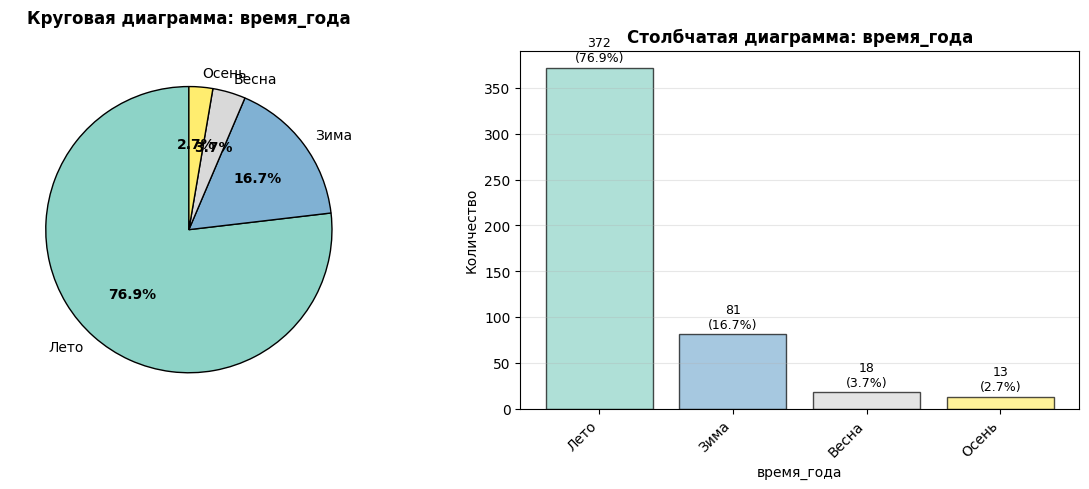

In [74]:
analyze_column(df['время_года'])

📊 Анализ столбца: климат
   Тип данных: object
   Уникальных значений: 5
   Пропущенных: 0 (0.0%)
   Всего значений: 484

📊 Статистика категориального столбца:
   Всего записей: 484
   Уникальных категорий: 5
   Самая частая категория: 'Cубтропический океанический' (270 записей, 55.8%)
   Самая редкая категория: 'Субтропическое высокогорье' (32 записей, 6.6%)

   Распределение по категориям:
   1. Cубтропический океанический: 270 (55.8%)
   2. Тропическая влажная саванна: 77 (15.9%)
   3. Жаркий полузасушливый: 70 (14.5%)
   4. Влажный субтропический муссонный: 35 (7.2%)
   5. Субтропическое высокогорье: 32 (6.6%)


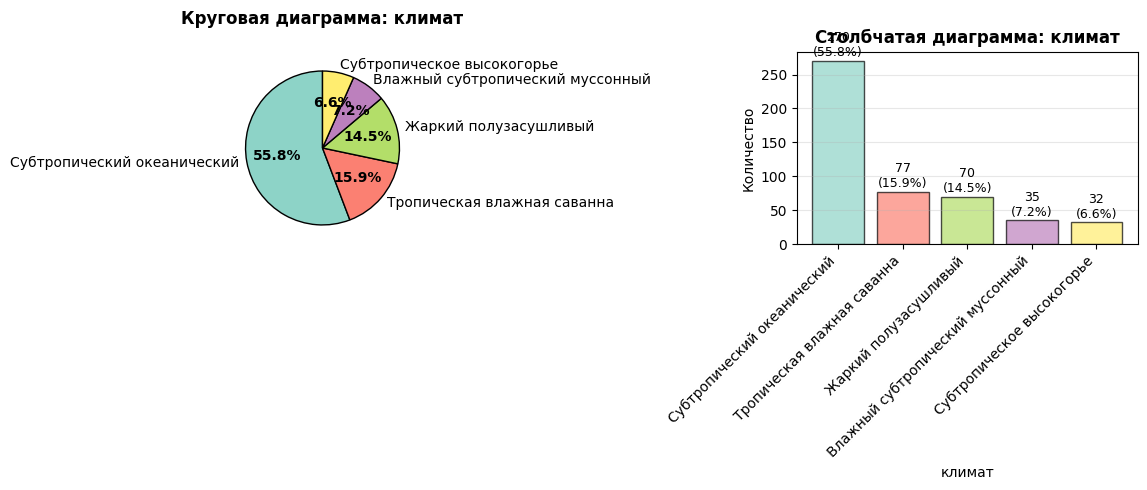

None


In [75]:
a = analyze_column(df['климат'])
print(a)

📊 Анализ столбца: город
   Тип данных: object
   Уникальных значений: 8
   Пропущенных: 0 (0.0%)
   Всего значений: 484

📊 Статистика категориального столбца:
   Всего записей: 484
   Уникальных категорий: 8
   Самая частая категория: 'Сидней' (198 записей, 40.9%)
   Самая редкая категория: 'Бангалор' (26 записей, 5.4%)

   Распределение по категориям:
   1. Сидней: 198 (40.9%)
   2. Техас: 72 (14.9%)
   3. Ченнай: 51 (10.5%)
   4. Ахмедабад: 38 (7.9%)
   5. Дели: 35 (7.2%)
   6. Шимла: 32 (6.6%)
   7. Хайдарабад: 32 (6.6%)
   8. Бангалор: 26 (5.4%)


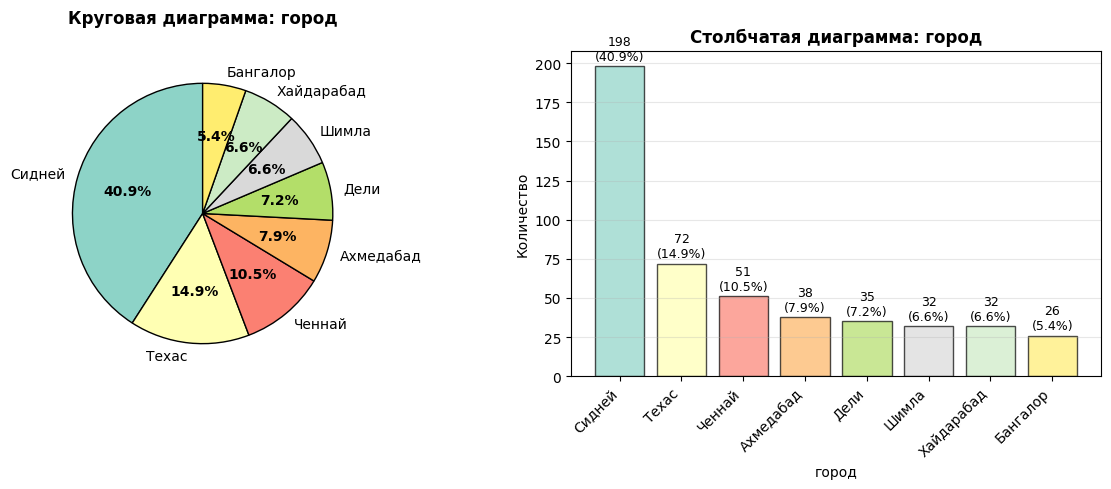

In [76]:
analyze_column(df['город'])

📊 Анализ столбца: страна
   Тип данных: object
   Уникальных значений: 3
   Пропущенных: 0 (0.0%)
   Всего значений: 484

📊 Статистика категориального столбца:
   Всего записей: 484
   Уникальных категорий: 3
   Самая частая категория: 'Индия' (214 записей, 44.2%)
   Самая редкая категория: 'США' (72 записей, 14.9%)

   Распределение по категориям:
   1. Индия: 214 (44.2%)
   2. Австралия: 198 (40.9%)
   3. США: 72 (14.9%)


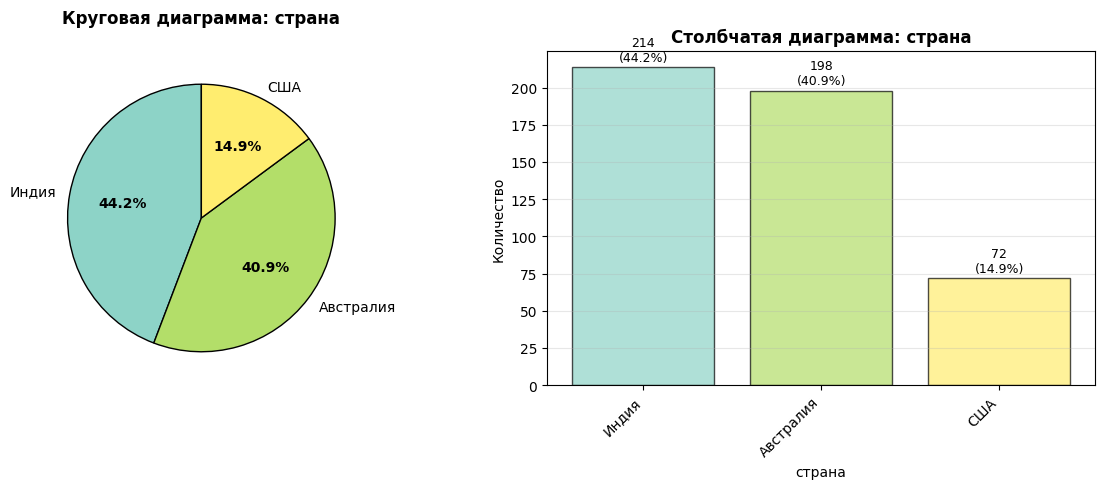

In [77]:
analyze_column(df['страна'])

📊 Анализ столбца: способ_охлаждения
   Тип данных: object
   Уникальных значений: 3
   Пропущенных: 0 (0.0%)
   Всего значений: 484

📊 Статистика категориального столбца:
   Всего записей: 484
   Уникальных категорий: 3
   Самая частая категория: 'Смешанный' (337 записей, 69.6%)
   Самая редкая категория: 'Вентиляция' (33 записей, 6.8%)

   Распределение по категориям:
   1. Смешанный: 337 (69.6%)
   2. Кондиционирование: 114 (23.6%)
   3. Вентиляция: 33 (6.8%)


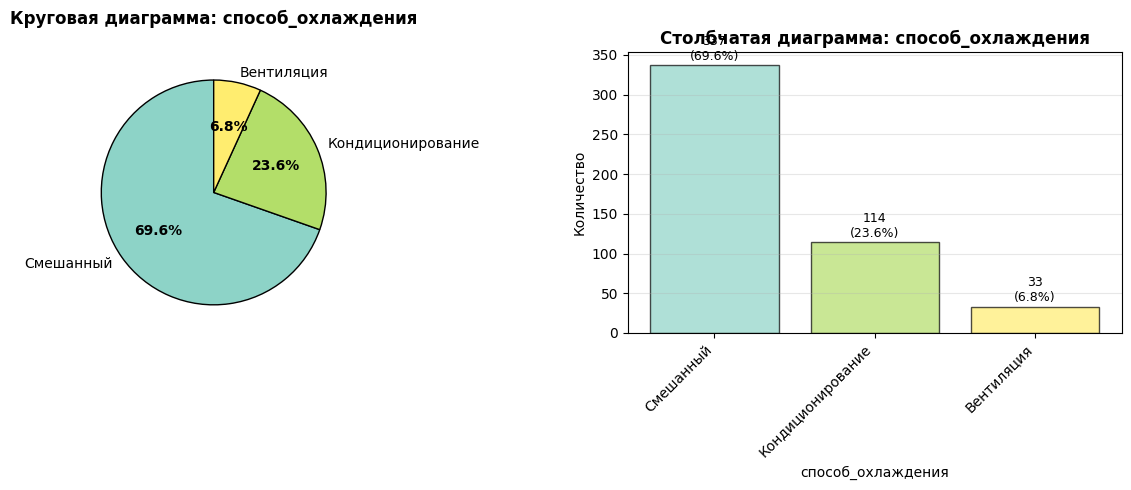

In [78]:
analyze_column(df['способ_охлаждения'])

📊 Анализ столбца: режим_при_смешанном_типе_охлаждения
   Тип данных: object
   Уникальных значений: 3
   Пропущенных: 0 (0.0%)
   Всего значений: 484

📊 Статистика категориального столбца:
   Всего записей: 484
   Уникальных категорий: 3
   Самая частая категория: 'Кондиционирование' (237 записей, 49.0%)
   Самая редкая категория: 'Вентиляция' (100 записей, 20.7%)

   Распределение по категориям:
   1. Кондиционирование: 237 (49.0%)
   2. -: 147 (30.4%)
   3. Вентиляция: 100 (20.7%)


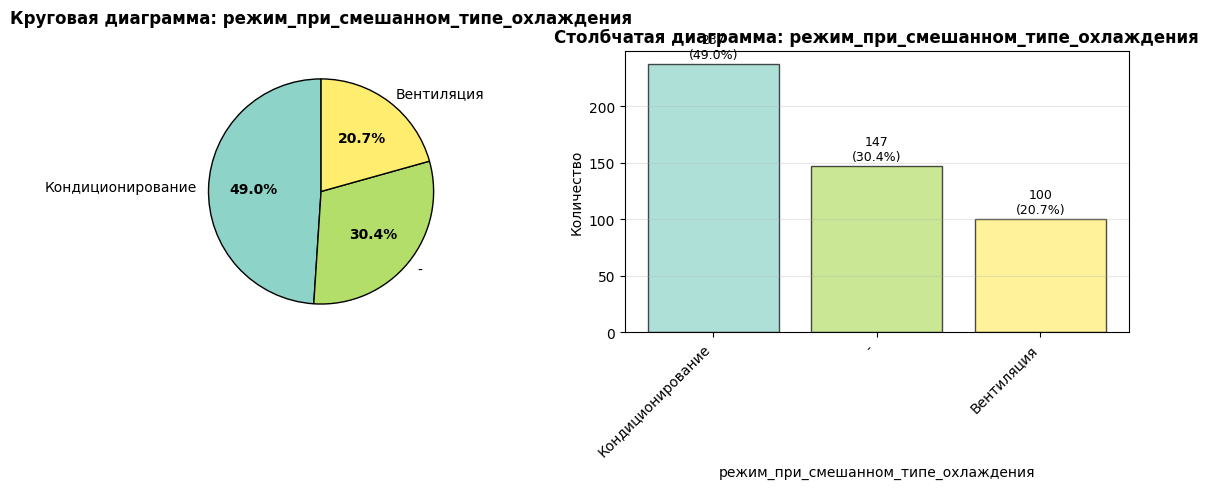

In [79]:
analyze_column(df['режим_при_смешанном_типе_охлаждения'])

📊 Анализ столбца: способ_обогрева
   Тип данных: object
   Уникальных значений: 2
   Пропущенных: 0 (0.0%)
   Всего значений: 484

📊 Статистика категориального столбца:
   Всего записей: 484
   Уникальных категорий: 2
   Самая частая категория: 'Без обогрева' (262 записей, 54.1%)
   Самая редкая категория: 'Механическое отопление' (222 записей, 45.9%)

   Распределение по категориям:
   1. Без обогрева: 262 (54.1%)
   2. Механическое отопление: 222 (45.9%)


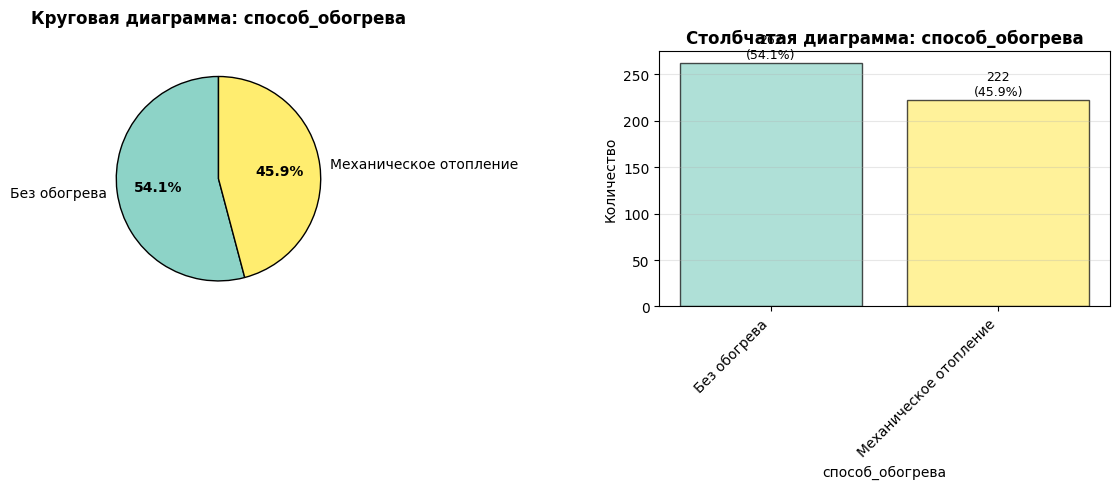

In [80]:
analyze_column(df['способ_обогрева'])

📊 Анализ столбца: вес
   Тип данных: float64
   Уникальных значений: 50
   Пропущенных: 0 (0.0%)
   Всего значений: 484

📈 Статистика числового столбца:
   Среднее: 54.46
   Медиана: 65.00
   Стандартное отклонение: 26.09
   Минимум: -1.00
   25%-й перцентиль: 54.75
   75%-й перцентиль: 69.00
   Максимум: 110.00
   IQR: 14.25
   Коэффициент искажения (skew): -1.39
   Интерпретация: сильное левостороннее искажение
   Выбросы: 80 (16.5%)


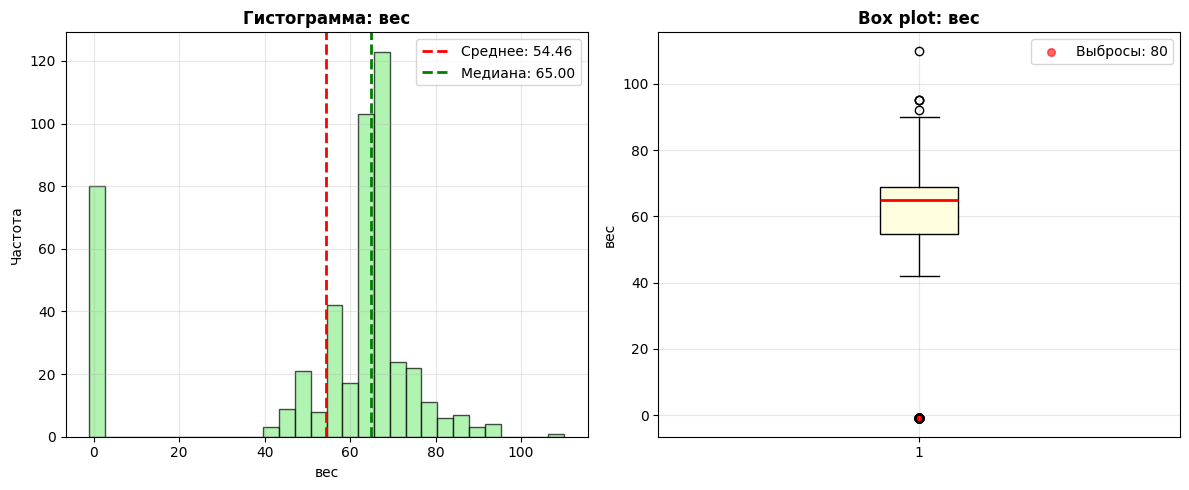

In [81]:
analyze_column(df['вес'])

# Расчёты и исследования

Импортируем всё для расчетов

In [82]:
from scipy.stats import shapiro, kruskal, pearsonr, f_oneway, spearmanr

In [83]:
df.loc[df["количество_рекламаций"] <= 1, "категория_рекламаций"] = "мало"
df.loc[df["количество_рекламаций"] == 2, "категория_рекламаций"] = "средне"
df.loc[df["количество_рекламаций"] > 2, "категория_рекламаций"] = "много"

In [84]:
mean_age = (df.groupby(['страна', 'пол'], as_index=False)['возраст'].mean().rename(columns={'возраст': 'средний_возраст'}))
mean_age

,страна,пол,средний_возраст
0,Австралия,Женский,46.348315
1,Австралия,Мужской,42.614679
2,Индия,Женский,37.507246
3,Индия,Мужской,37.910345
4,США,Неизвестно,36.208333


In [85]:
df.loc[df["возраст"] < 45, "возрастная_группа"] = "молодой"
df.loc[(df["возраст"] >= 45) & (df["возраст"] <= 59), "возрастная_группа"] = "средний"
df.loc[df["возраст"] >= 60, "возрастная_группа"] = "пожилой"

In [86]:
comfortable = df[df['ощущение_температуры_(bool)'] == 1]
mean_comfort_temp = (comfortable.groupby('возрастная_группа', as_index=False)['температура_воздуха_в_помещении'].mean().rename(columns={'температура_воздуха_в_помещении': 'ср_комфортная_температура'}))
mean_comfort_temp

,возрастная_группа,ср_комфортная_температура
0,молодой,25.313327
1,пожилой,25.400000
2,средний,24.398884


In [87]:
median_temp = (df.groupby('способ_охлаждения', as_index=False).agg(медиана_температуры=('температура_воздуха_в_помещении', 'median'),медиана_rh=('rh', 'median')))
median_temp

,способ_охлаждения,медиана_температуры,медиана_rh
0,Вентиляция,25.3,46.30
1,Кондиционирование,24.4,42.45
2,Смешанный,24.7,56.30


In [88]:
df["процент_удовлетворённых"] = (df.groupby(["страна", "пол"])["ощущение_температуры_(bool)"].transform("mean") * 100)
df

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_(bool),предпочтительное_изменение_температуры,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций,категория_рекламаций,возрастная_группа,процент_удовлетворённых
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,22.0,Неизвестно,0.0,True,Без изменений,False,Без изменений,3.5,0.54,22.900000,48.9,0.260000,-1.0,-1.0,True,True,False,False,False,28.900000,0,мало,молодой,75.000000
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,40.0,Неизвестно,-2.0,True,Без изменений,False,Без изменений,6.0,0.61,31.423611,39.2,0.120000,-1.0,-1.0,False,False,False,False,False,43.031944,0,мало,молодой,75.000000
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,42.0,Неизвестно,1.0,True,Без изменений,False,Без изменений,5.0,0.57,25.600000,34.7,0.080000,-1.0,-1.0,False,False,False,False,False,32.800000,0,мало,молодой,75.000000
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,27.0,Неизвестно,-0.5,False,Теплее,False,Без изменений,2.5,0.61,24.200000,50.0,27.160000,-1.0,-1.0,True,True,False,False,False,28.900000,1,мало,молодой,75.000000
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,-,Без обогрева,46.0,Неизвестно,0.0,True,Без изменений,False,Меньше,4.5,0.57,23.800000,35.8,4.385694,-1.0,-1.0,True,True,False,False,False,32.800000,0,мало,средний,75.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2012.0,Лето,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,Без обогрева,35.0,Мужской,0.0,True,Теплее,False,Без изменений,5.0,0.46,31.600000,69.1,0.320000,172.7,50.0,False,True,True,False,False,30.900000,0,мало,молодой,80.000000
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Мужской,-1.0,True,Без изменений,False,Без изменений,5.0,0.64,26.500000,61.0,0.160000,170.2,65.0,False,False,False,False,False,30.800000,0,мало,молодой,80.000000
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Женский,-1.0,True,Холоднее,False,Больше,5.0,0.74,26.900000,42.0,0.020000,161.3,76.0,False,False,False,False,False,21.600000,0,мало,молодой,79.710145
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,Без обогрева,35.0,Женский,-1.0,True,Холоднее,False,Больше,5.0,0.74,26.900000,42.0,0.020000,161.3,76.0,False,False,False,False,False,21.600000,0,мало,молодой,79.710145


In [89]:
summary_df_comfort = pd.pivot_table(df, index=['страна', 'пол', 'возрастная_группа'], values=['температура_воздуха_в_помещении', 'среднемесячная_температура_на_улице', 'rh'], aggfunc='mean')
summary_df_comfort

rh  \
страна    пол        возрастная_группа              
Австралия Женский    молодой            61.368000   
                     пожилой            44.550000   
                     средний            61.266071   
          Мужской    молодой            61.668889   
                     пожилой            64.366667   
                     средний            61.680328   
Индия     Женский    молодой            49.959574   
                     средний            49.050000   
          Мужской    молодой            49.535556   
                     пожилой            78.800000   
                     средний            52.175926   
США       Неизвестно молодой            38.995000   
                     средний            38.808333   

                                        среднемесячная_температура_на_улице  \
страна    пол        возрастная_группа                                        
Австралия Женский    молодой                                      22.000000   
                     пожилой                                      22.000000   
                     средний                                      22.017857   
          Мужской    молодой                                      22.000000   
                     пожилой                                      22.000000   
                     средний                                      22.000000   
Индия     Женский    молодой                                      27.923404   
                     средний                                      23.345455   
          Мужской    молодой                                      27.210000   
                     пожилой                                      29.500000   
                     средний                                      24.072222   
США       Неизвестно молодой                                      33.170324   
                     средний                                      31.285995   

                                        температура_воздуха_в_помещении  
страна    пол        возрастная_группа                                   
Австралия Женский    молодой                                  23.840000  
                     пожилой                                  24.900000  
                     средний                                  24.112500  
          Мужской    молодой                                  24.146667  
                     пожилой                                  24.733333  
                     средний                                  24.044262  
Индия     Женский    молодой                                  26.682979  
                     средний                                  24.995455  
          Мужской    молодой                                  25.871111  
                     пожилой                                  29.300000  
                     средний                                  26.327778  
США       Неизвестно молодой                                  25.378542  
                     средний                                  25.026968

In [90]:
df.loc[df["rh"] < 40, "категория_rh"] = "ниже_комфортной"
df.loc[(df["rh"] >= 40) & (df["rh"] <= 60), "категория_rh"] = "комфортная"
df.loc[df["rh"] > 60, "категория_rh"] = "выше_комфортной"
df[['rh', "категория_rh"]]

,rh,категория_rh
0,48.9,комфортная
1,39.2,ниже_комфортной
2,34.7,ниже_комфортной
3,50.0,комфортная
4,35.8,ниже_комфортной
...,...,...
479,69.1,выше_комфортной
480,61.0,выше_комфортной
481,42.0,комфортная
482,42.0,комфортная


In [91]:
numeric_cols = [
    'оценка_комфорта',
    'ощущение_температуры',
    'температура_воздуха_в_помещении',
    'скорость_воздуха',
    'rh'
]

for col in numeric_cols:
    p = shapiro(df[col].dropna()).pvalue
    print(f'{col}: p-value = {p:.20f}')


оценка_комфорта: p-value = 0.00000000000002008442
ощущение_температуры: p-value = 0.00000000000000002407
температура_воздуха_в_помещении: p-value = 0.00000000000000000024
скорость_воздуха: p-value = 0.00000000000000000000
rh: p-value = 0.00072205714630542569


то есть распределение ненормальное, значит нужно использовать Спирмена

In [92]:
df_corr = df.drop(columns=['Unnamed: 0'], errors='ignore')
corr_matrix = df_corr.corr(method='spearman',numeric_only=True)
corr_matrix

,год,возраст,ощущение_температуры,ощущение_температуры_(bool),ощущение_движения_воздуха_(bool),оценка_комфорта,утепление,температура_воздуха_в_помещении,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций,процент_удовлетворённых
год,1.000000,-0.274904,-0.226410,0.007983,-0.743954,0.320419,0.824924,0.373426,-0.388196,-0.023017,-0.008496,0.016123,-0.017955,0.224909,-0.083209,0.095957,0.403657,0.257705,0.064873,0.048490
возраст,-0.274904,1.000000,0.067933,-0.024518,0.209626,-0.021467,-0.195808,-0.077933,0.151220,-0.071118,-0.130104,0.077505,-0.143945,-0.138107,0.106047,-0.024640,-0.353625,-0.267399,-0.156950,-0.038185
ощущение_температуры,-0.226410,0.067933,1.000000,-0.356609,0.120259,-0.170806,-0.271630,0.107732,0.104561,-0.005031,0.125393,0.172933,-0.138062,-0.044348,0.082400,0.028730,-0.077582,-0.064269,0.073113,0.089014
ощущение_температуры_(bool),0.007983,-0.024518,-0.356609,1.000000,0.245845,0.179102,0.049909,-0.122093,0.055350,-0.083713,0.112059,0.017946,-0.041992,-0.079956,0.022334,0.002382,0.061637,-0.097521,-0.269628,0.152395
ощущение_движения_воздуха_(bool),-0.743954,0.209626,0.120259,0.245845,1.000000,-0.191026,-0.607736,-0.299872,0.445620,-0.139501,0.221261,0.204977,-0.191875,-0.290081,0.137728,-0.074073,-0.255629,-0.338757,-0.164733,0.197034
оценка_комфорта,0.320419,-0.021467,-0.170806,0.179102,-0.191026,1.000000,0.279980,0.046857,-0.053574,-0.133886,0.134883,0.113527,-0.228585,-0.156090,-0.005810,0.043860,0.190000,-0.076271,-0.366340,0.050614
утепление,0.824924,-0.195808,-0.271630,0.049909,-0.607736,0.279980,1.000000,0.190358,-0.399672,-0.113156,-0.030997,0.001899,-0.001450,0.088274,-0.151244,0.041633,0.312549,0.105689,0.104841,0.021329
температура_воздуха_в_помещении,0.373426,-0.077933,0.107732,-0.122093,-0.299872,0.046857,0.190358,1.000000,-0.122014,0.208088,-0.093082,-0.020215,-0.128533,0.188103,0.114183,0.200708,0.091437,0.406426,0.013796,0.023991
rh,-0.388196,0.151220,0.104561,0.055350,0.445620,-0.053574,-0.399672,-0.122014,1.000000,-0.121139,0.352218,0.319116,-0.293492,-0.126507,0.195050,-0.062932,0.037766,-0.195548,-0.194086,0.205944
скорость_воздуха,-0.023017,-0.071118,-0.005031,-0.083713,-0.139501,-0.133886,-0.113156,0.208088,-0.121139,1.000000,-0.197548,-0.230920,0.326214,0.525920,0.096613,-0.057947,0.099122,0.524167,0.139419,-0.137771


In [93]:
for col in corr_matrix.columns:
    corr_matrix.loc[col, col] = 0
corr_filtered = corr_matrix.where(corr_matrix.abs() > 0.5)
corr_pairs_clean = corr_filtered.stack().reset_index()
corr_pairs_clean.columns = ["параметр_1", "параметр_2", "корреляция"]
corr_pairs_clean

,параметр_1,параметр_2,корреляция
0,год,ощущение_движения_воздуха_(bool),-0.743954
1,год,утепление,0.824924
2,ощущение_движения_воздуха_(bool),год,-0.743954
3,ощущение_движения_воздуха_(bool),утепление,-0.607736
4,утепление,год,0.824924
5,утепление,ощущение_движения_воздуха_(bool),-0.607736
6,скорость_воздуха,вентилятор,0.525920
7,скорость_воздуха,среднемесячная_температура_на_улице,0.524167
8,рост,вес,0.735202
9,рост,процент_удовлетворённых,0.625485


В ходе анализа корреляционной матрицы были выявлены несколько значимых связей между параметрами:
1) Наиболее сильная положительная корреляция наблюдается между годом проведения исследования и уровнем утепления одежды респондентов (r = 0.82).
Данная зависимость, вероятнее всего, не отражает прямой причинно-следственной связи, а обусловлена особенностями структуры выборки: исследования в разные годы могли проводиться в разных странах, климатических зонах и сезонах. В результате в отдельных временных периодах могли преобладать либо более холодные, либо более тёплые условия.
Таким образом, выявленная корреляция является артефактом данных, а не физической закономерностью.

2) Выявлена выраженная положительная корреляция между состоянием занавесок и работой вентилятора(r = 0.68).
Данная зависимость имеет логичное практическое объяснение: при использовании вентилятора и активном охлаждении помещения занавески чаще закрываются для снижения солнечной инсоляции и дополнительного нагрева воздуха.
Эта связь отражает поведенческие и эксплуатационные особенности использования оборудования, а не физические параметры микроклимата.

3) Наблюдается устойчивая положительная корреляция между состоянием окон и дверей(r = 0.61).
Это объясняется тем, что при проветривании помещения пользователи, как правило, открывают окна и двери одновременно, а при использовании механических систем охлаждения — закрывают их.
Данная зависимость является ожидаемой и отражает режимы эксплуатации помещений

4) Выявлена умеренная положительная корреляция между скоростью движения воздуха в помещении и среднемесячной температурой наружного воздуха(r = 0.52).
Это имеет физический смысл: в более тёплые периоды чаще используются вентиляция, вентиляторы или интенсивные режимы воздухообмена, что приводит к увеличению скорости движения воздуха внутри помещений

5) Обнаружена сильная положительная корреляция между ростом и весом респондентов, что является естественной зависимостью и подтверждает корректность исходных данных(r = 0.73).
При этом данная связь не имеет прямого отношения к задачам анализа микроклимата и комфорта

В целом анализ показывает, что наиболее сильные корреляции наблюдаются либо между антропометрическими показателями, либо между параметрами режимов эксплуатации помещений.
При этом прямых сильных корреляций между отдельными параметрами микроклимата и субъективной оценкой комфорта не выявлено.

Это подтверждает, что комфорт в офисных помещениях формируется за счёт совокупного влияния температуры, влажности, движения воздуха и пользовательских режимов, а не определяется одним изолированным фактором.
Следовательно, при разработке и продвижении климатического оборудования ключевым является комплексный подход к управлению микроклиматом, а также адаптация решений под региональные и эксплуатационные особенности.

# Регрессионное моделирование


Для начала определим факторы и отклик и разделим данные на обучающую и тестовую выборки.

In [94]:
# Определим количественные и категориальные факторы
df.dtypes

,0
год,float64
время_года,object
климат,object
город,object
страна,object
способ_охлаждения,object
режим_при_смешанном_типе_охлаждения,object
способ_обогрева,object
возраст,float64
пол,object


In [95]:
# Факторы
factors = ['время_года', 'климат', 'способ_охлаждения',
         'режим_при_смешанном_типе_охлаждения', 'способ_обогрева',
         'ощущение_температуры', 'утепление',
         'rh', 'скорость_воздуха',
         'окно', 'отопление',
         'среднемесячная_температура_на_улице']

# Количественные факторы
factors_num = ['ощущение_температуры', 'утепление',
         'rh', 'скорость_воздуха',
         'окно', 'отопление',
         'среднемесячная_температура_на_улице']

# Номинальные факторы
factors_cat = ['время_года', 'климат', 'способ_охлаждения',
         'режим_при_смешанном_типе_охлаждения', 'способ_обогрева']

# Отклик
response = 'температура_воздуха_в_помещении'

In [96]:
# Разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(
    df[factors],
    df[response],
    test_size=0.2,
    random_state=42)

In [97]:
# Далее с помощью OneHotEncoder преобразуем категориальные шкалы в количественные
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ohe.fit(x_train[factors_cat])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [98]:
# Переводим категориальные факторы в количественные
x_train_encoded = ohe.transform(x_train[factors_cat])
x_test_encoded = ohe.transform(x_test[factors_cat])

# Объединяем факторы в один массив
x_train_final = np.column_stack([
    x_train[factors_num].values,
    x_train_encoded
])

x_test_final = np.column_stack([
    x_test[factors_num].values,
    x_test_encoded
])

Преобразуем данные тестовой выборки в DataFrame, чтобы построить подробную матрицу корреляций.

In [99]:
# Выбираем названия нужных признаков
num_columns = factors_num
cat_columns = ohe.get_feature_names_out(factors_cat)
all_columns = np.concatenate([num_columns, cat_columns])

# Переводим в DataFrame
x_train_final_df = pd.DataFrame(
    np.column_stack([x_train[factors_num].values, x_train_encoded]),
    columns=all_columns
)

x_test_final_df = pd.DataFrame(
    np.column_stack([x_test[factors_num].values, x_test_encoded]),
    columns=all_columns
)

# Вывод
x_train_final_df

,ощущение_температуры,утепление,rh,скорость_воздуха,окно,отопление,среднемесячная_температура_на_улице,время_года_Зима,время_года_Лето,время_года_Осень,климат_Влажный субтропический муссонный,климат_Жаркий полузасушливый,климат_Субтропическое высокогорье,климат_Тропическая влажная саванна,способ_охлаждения_Кондиционирование,способ_охлаждения_Смешанный,режим_при_смешанном_типе_охлаждения_Вентиляция,режим_при_смешанном_типе_охлаждения_Кондиционирование,способ_обогрева_Механическое отопление
0,0.0,0.53,60.4,0.56,False,True,30.9,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.54,40.8,0.17,False,False,28.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.5,28.3,0.15,False,False,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,0.72,62.1,0.05,False,True,30.8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.46,72.9,0.11,True,False,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.0,0.58,60.2,0.1,False,False,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
383,0.0,0.67,80.5,0.0,False,False,18.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
384,0.0,0.6,55.1,0.11,False,True,30.9,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
385,0.0,1.75,40.1,0.04,False,False,8.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


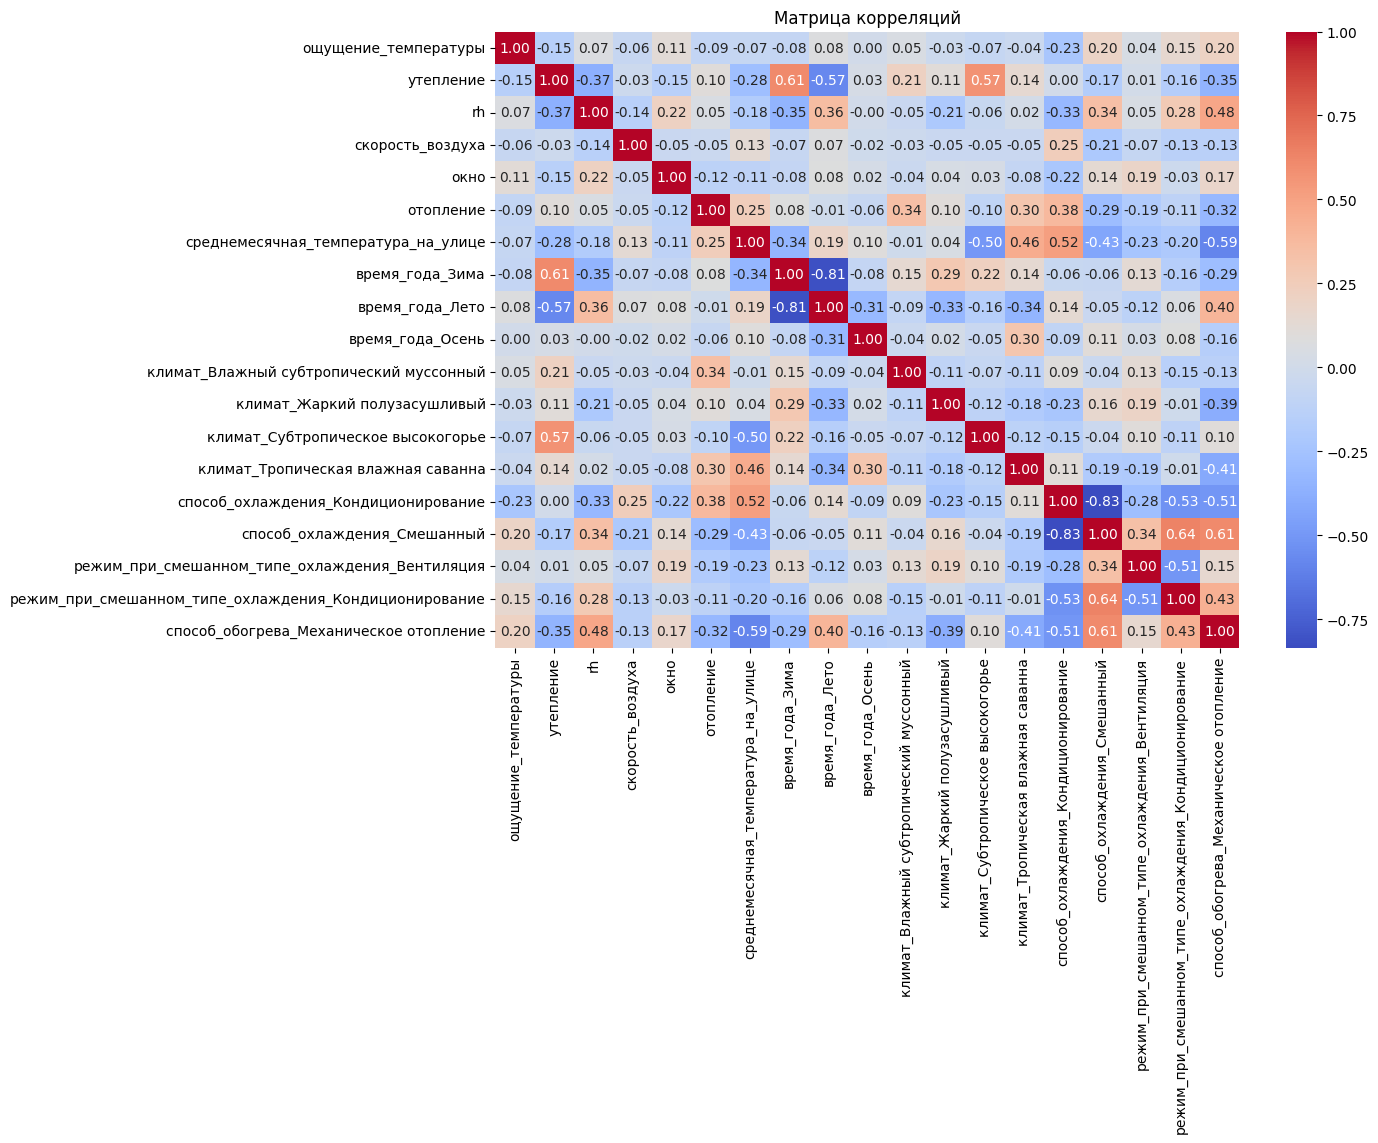

In [100]:
# Проверим, нет ли коррелирующих факторов
corr = x_train_final_df.corr()

# Задаем размеры диаграммы
plt.figure(figsize=(12, 8))

# Строим тепловую карту
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

# Заголовок
plt.title("Матрица корреляций")

# Вывод
plt.show()

Наблюдаем сильную обратную корреляцию между преобразованными факторами, которые должны исключать друг друга (если время года - лето, то факторы остальных времен года всегда будут 0), между числовыми факторами сильных корреляций не выявлено.

Для улучшения точности предсказаний модели добавим масштабируемость, т.к. значения разных факторов довольно сильно отличаются по порядку.

In [101]:
# Используем StandardScaler для масштабируемости
scaler = StandardScaler()

# Применяем для выборок
x_train_scaled = scaler.fit_transform(x_train_final_df)
x_test_scaled = scaler.transform(x_test_final_df)

In [102]:
# Преобразуем в DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=all_columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=all_columns)

Построим модель линейной регрессии и посчитаем ее точность.

In [103]:
# Инициализируем модель линейной регрессии
lin_reg = LinearRegression()

# Обучаем модель на данных обучающей выборки
lin_reg.fit(x_train_scaled_df, y_train)

# Строим предсказания модели
prediction = lin_reg.predict(x_test_scaled_df)

Для оценки качества предсказаний модели будем использовать MAE, RMSE и R2.

In [104]:
# MAE
mean_absolute_error(y_test, prediction)

1.444975908215132

In [105]:
# RMSE
root_mean_squared_error(y_test, prediction)

1.918164364129627

In [106]:
# R2
r2_score(y_test, prediction)

0.4038362489051954

По метрикам можем сделать вывод, что она плохо предсказывает значение температуры в помещении. Скорее всего, это связано с недостатком данных или неправильно подобранным типом предсказательной модели.

# Гипотезы

**Первая гипотеза: Влияет ли способ охлаждения на оценку комфорта?**

In [107]:
g1 = df.groupby('способ_охлаждения')['оценка_комфорта'].mean()
g2 = df.groupby('способ_охлаждения')['оценка_комфорта'].size()

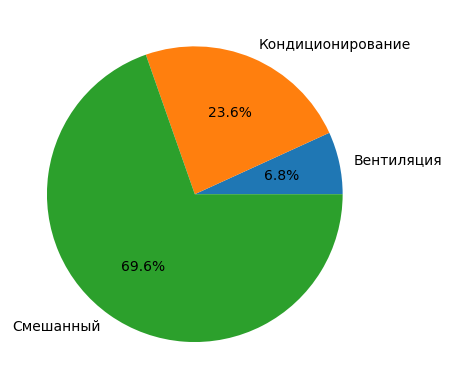

In [108]:
plt.pie(g2, labels=g1.index, autopct="%1.1f%%")
plt.show()

/tmp/ipython-input-1545358160.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(g1, palette='viridis')


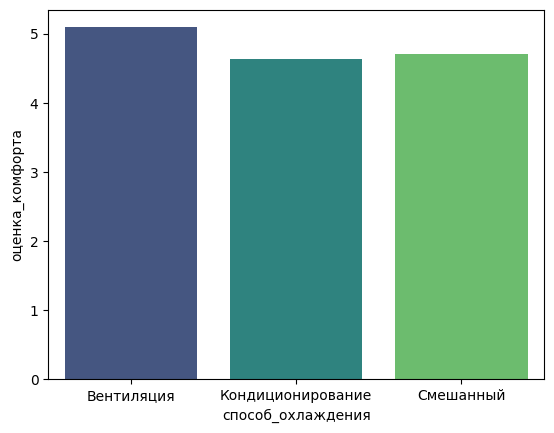

In [109]:
sns.barplot(g1, palette='viridis')
plt.show()

In [110]:
if shapiro(df['оценка_комфорта']).pvalue > 0.05:
  print('Нормальное распределение')
else:
  print("Ненормальное распределение")

Ненормальное распределение


(array([  1.,   0.,  11.,   6.,  51.,  42.,  66.,  53., 108., 146.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

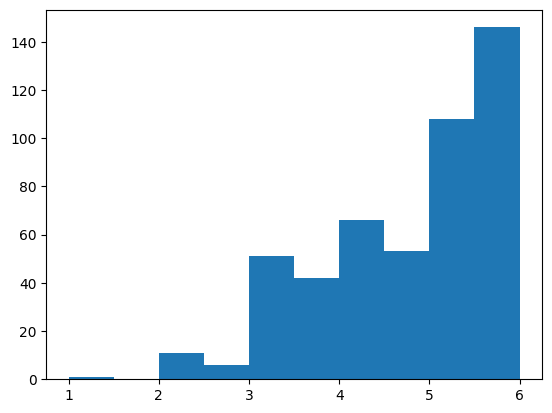

In [111]:
plt.hist(df['оценка_комфорта'])

In [112]:
# Используем метод Краскела-Уоллеса ввиду ненормального распределения количественной шкалы и наличия более 2-х уровней в номинальной шкале
f1 = df[df['способ_охлаждения'] == 'Вентиляция']['оценка_комфорта']
f2 = df[df['способ_охлаждения'] == 'Кондиционирование']['оценка_комфорта']
f3 = df[df['способ_охлаждения'] == 'Смешанный']['оценка_комфорта']

kruskal(f1, f2, f3) # следовательно есть различия, значит при вентиляции оценка комфорта выше

KruskalResult(statistic=np.float64(8.497132845503835), pvalue=np.float64(0.014284697454724682))

**Вторая гипотеза: Влияет ли пол на оценку комфорта?**

In [113]:
g3 = df.groupby('пол')['оценка_комфорта'].mean()
g4 = df.groupby('пол')['оценка_комфорта'].size()
g3, g4

(пол
 Женский       4.768987
 Мужской       4.826772
 Неизвестно    4.194444
 Name: оценка_комфорта, dtype: float64,
 пол
 Женский       158
 Мужской       254
 Неизвестно     72
 Name: оценка_комфорта, dtype: int64)

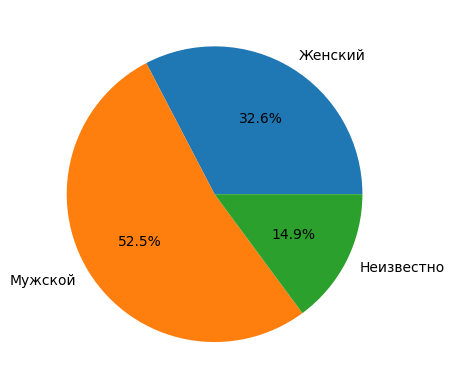

In [114]:
plt.pie(g4, labels=g4.index, autopct="%1.1f%%")
plt.show()

/tmp/ipython-input-633157692.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(g3, palette='viridis')


<Axes: xlabel='пол', ylabel='оценка_комфорта'>

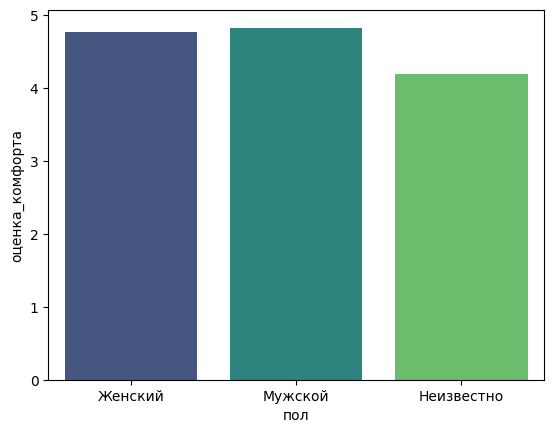

In [115]:
sns.barplot(g3, palette='viridis')

In [116]:
p1 = df[df['пол'] == 'Мужской']['оценка_комфорта']
p2 = df[df['пол'] == 'Женский']['оценка_комфорта']
p3 = df[df['пол'] == 'Неизвестно']['оценка_комфорта']

kruskal(p1, p2, p3) # следовательно есть различия, значит при неизвестном поле оценка ниже, а между мужский и женским полом нет особо

KruskalResult(statistic=np.float64(16.797234241643046), pvalue=np.float64(0.00022517850363157736))

**Третья гипотеза: Влияет ли возрастная группа на оценку комфорта?**

Гипотеза 3:
Влияет ли возрастная группа на оценку комфорта?

H₀: Оценка комфорта одинакова независимо от возрастной группы.

H₁: Возрастные группы по-разному оценивают уровень комфорта.

In [117]:
# Создадим новый категориальный признак на основе возраста, в котором поделим людей на 3 категории: <30, 30-50, >50
df['возраст_кат'] = df['возраст'].apply(lambda x: '<30' if x < 30
                                        else '30-50' if 30 <= x <= 50
                                        else '>50')

# Вывод
df[['возраст_кат', 'оценка_комфорта']]

,возраст_кат,оценка_комфорта
0,<30,3.5
1,30-50,6.0
2,30-50,5.0
3,<30,2.5
4,30-50,4.5
...,...,...
479,30-50,5.0
480,30-50,5.0
481,30-50,5.0
482,30-50,5.0


Шкалы разного типа, смотрим на количество уровней номинальной шкалы возраста (разделили на 3 уровня) и распределение количественной шкалы оценки.

Проверим на нормальность шкалу оценок:

In [118]:
# Выведем информацию о значениях данного признака
df['оценка_комфорта'].describe()

,оценка_комфорта
count,484.000000
mean,4.713843
std,1.063937
min,1.000000
25%,4.000000
50%,5.000000
75%,5.700000
max,6.000000


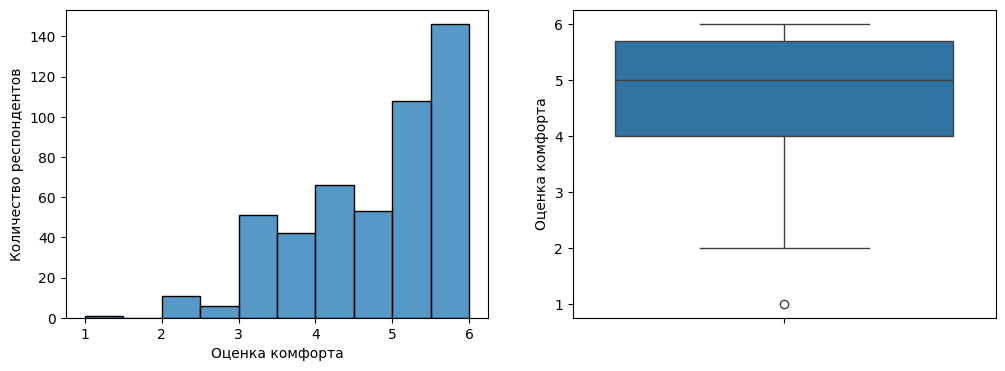

In [119]:
# Выделяем пространство и задаем размеры диаграмм
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Изображаем гистограмму
sns.histplot(df, bins=10, x='оценка_комфорта', ax=axes[0])

# Подписываем оси
axes[0].set_xlabel('Оценка комфорта')
axes[0].set_ylabel('Количество респондентов')

# Изображаем ящик с усами
sns.boxplot(df['оценка_комфорта'], ax=axes[1])

# Подписываем оси
axes[1].set_ylabel('Оценка комфорта')

# Вывод
plt.show()

Видно, что шкала оценки (количественная) имеет ненормальное распределение.

Следовательно, используем критерий Краскела-Уоллеса.

In [120]:
# Отбираем только нужные данные для критерия
age_30 = df[df['возраст_кат'] == '<30']['оценка_комфорта']
age_30_50 = df[df['возраст_кат'] == '30-50']['оценка_комфорта']
age_50 = df[df['возраст_кат'] == '>50']['оценка_комфорта']

# Вычисляем критерий и p-value
stat, p_value = kruskal(age_30, age_30_50, age_50)

# Вывод
float(stat), float(p_value)

(1.2676330016735355, 0.5305630378034558)

Полученный p-value сильно больше 0.05, следовательно, принимаем нулевую гипотезу и считаем, что оценка комфорта не зависит от возрастной группы.

---



**Четвёртая гипотеза: Есть ли взаимосвязь между количеством рекламаций и оценкой комфорта?**

Есть ли взаимосвязь между количеством рекламаций и оценкой комфорта?

H₀ (нулевая гипотеза):
между количеством рекламаций и оценкой комфорта нет связи

H₁ (альтернативная гипотеза):
между количеством рекламаций и оценкой комфорта есть статистически значимая связь

In [121]:
x = df['количество_рекламаций'].dropna()
y = df['оценка_комфорта'].dropna()

print('Проверка нормальности:')
print('Количество рекламаций:', shapiro(x).pvalue)
print('Оценка комфорта:', shapiro(y).pvalue)

Проверка нормальности:
Количество рекламаций: 4.646132948507633e-40
Оценка комфорта: 2.0084419784618444e-14


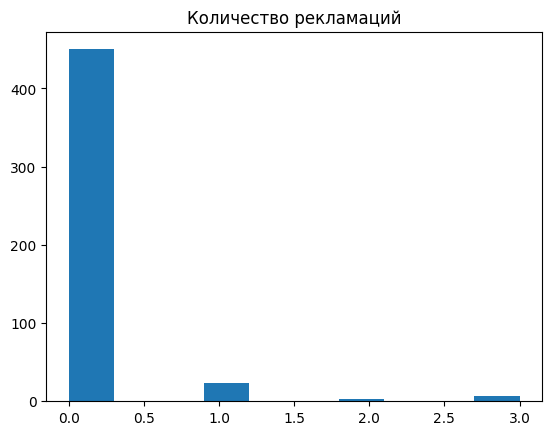

In [122]:
plt.hist(x)
plt.title('Количество рекламаций')
plt.show()

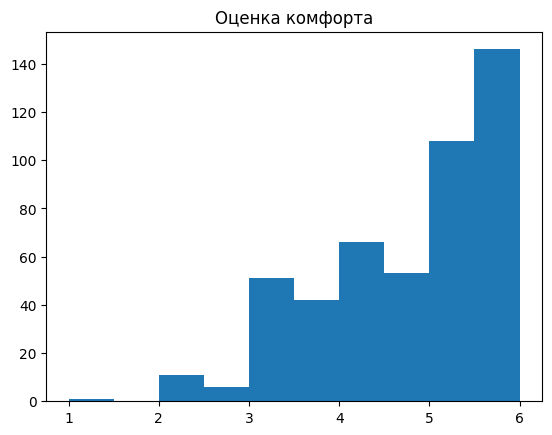

In [123]:
plt.hist(y)
plt.title('Оценка комфорта')
plt.show()


Видим, что распределение ненормальное, значит используем Спирмена

In [124]:
corr, p_value = spearmanr(x, y, nan_policy='omit')

print(f"Коэффициент корреляции Спирмена r = {corr:.3f}")
print(f"p-value = {p_value:.20f}")
alpha = 0.05
if p_value < alpha:
    print("Связь статистически значима (p < 0.05). Нулевая гипотеза отвергается.")
    if corr < 0:
        print("Связь отрицательная: чем больше рекламаций, тем ниже оценка комфорта.")
    else:
        print("Связь положительная.")
else:
    print("Статистически значимая связь не обнаружена. Нулевая гипотеза не отвергается.")

Коэффициент корреляции Спирмена r = -0.366
p-value = 0.00000000000000008085
Связь статистически значима (p < 0.05). Нулевая гипотеза отвергается.
Связь отрицательная: чем больше рекламаций, тем ниже оценка комфорта.


**Пятая гипотеза: Различается ли оценка комфорта в разных странах?**

Проверить гипотезу о том, что средняя оценка комфорта отличается в зависимости от страны

H₀: средняя оценка комфорта одинакова во всех странах

H₁: хотя бы в одной стране средняя оценка комфорта отличается

In [125]:
shapiro(df['оценка_комфорта']).pvalue

np.float64(2.0084419784618444e-14)

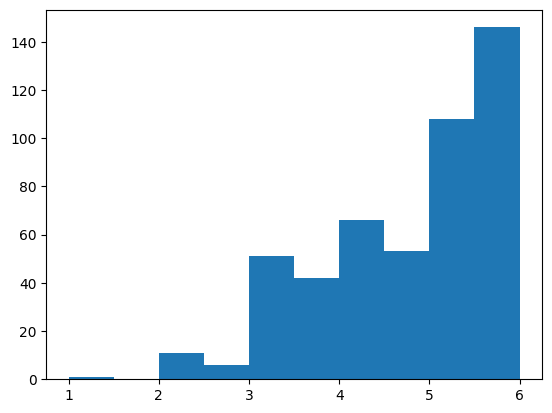

In [126]:
plt.hist(df['оценка_комфорта'])
plt.show()

Видно, что распределение ненормальное, значит нужно использовать метод Краскела-Уоллеса

In [127]:
groups = []
for country in df['страна'].dropna().unique():
    group = df.loc[df['страна'] == country, 'оценка_комфорта']
    groups.append(group)

h_stat, p_value = kruskal(*groups)

print(f"H-статистика Краскела–Уоллиса = {round(h_stat, 3)}")
print(f"p-value = {p_value:.20f}")

alpha = 0.05
if p_value < alpha:
    print("Средняя оценка комфорта статистически значимо отличается по странам.")
    print("Нулевая гипотеза отвергается.")
else:
    print("Статистически значимых различий не выявлено.")
    print("Нулевая гипотеза не отвергается.")


H-статистика Краскела–Уоллиса = 64.014
p-value = 0.00000000000001257785
Средняя оценка комфорта статистически значимо отличается по странам.
Нулевая гипотеза отвергается.


In [128]:
mean_country = df.groupby("страна", as_index=False)["оценка_комфорта"].mean().rename(columns={"оценка_комфорта": "средняя_оценка_комфорта"})
mean_country

,страна,средняя_оценка_комфорта
0,Австралия,4.500000
1,Индия,5.086449
2,США,4.194444


Для проверки различий в оценке комфорта между странами была проведена проверка нормальности распределения показателя с использованием критерия Шапиро–Уилка, которая показала отклонение от нормального распределения. Ввиду порядковой шкалы показателя и ненормальности распределений для сравнения нескольких независимых групп был использован критерий Краскела–Уоллиса.

В результате анализа выявлены статистически значимые различия в оценке комфорта между странами (p < 0.05), что позволяет отвергнуть нулевую гипотезу о равенстве средних значений

**Дополнительная гипотеза 1: Связана ли влажность с ощущением более низкой температуры?**

H₀: Влажность не влияет на ощущение температуры.

H₁: Чем выше влажность, тем более низкую температуру чувствуют люди.

In [129]:
# Рассмотрим два этих признака и определим типы шкал
df[['rh', 'ощущение_температуры']]

,rh,ощущение_температуры
0,48.9,0.0
1,39.2,-2.0
2,34.7,1.0
3,50.0,-0.5
4,35.8,0.0
...,...,...
479,69.1,0.0
480,61.0,-1.0
481,42.0,-1.0
482,42.0,-1.0


Замечаем, что обе шкалы количественные, проверим их на нормальность:

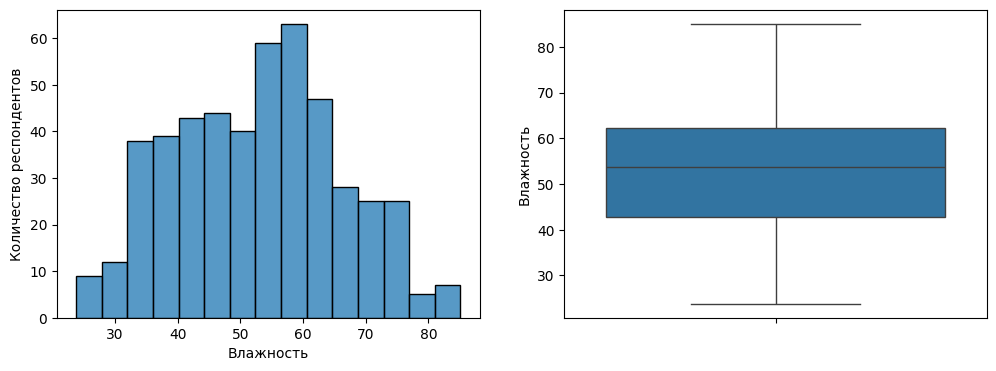

In [130]:
# Выделяем пространство и задаем размеры диаграмм
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Изображаем гистограмму
sns.histplot(df, bins=15, x='rh', ax=axes[0])

# Подписываем оси
axes[0].set_xlabel('Влажность')
axes[0].set_ylabel('Количество респондентов')

# Изображаем ящик с усами
sns.boxplot(df['rh'], ax=axes[1])

# Подписываем оси
axes[1].set_ylabel('Влажность')

# Вывод
plt.show()

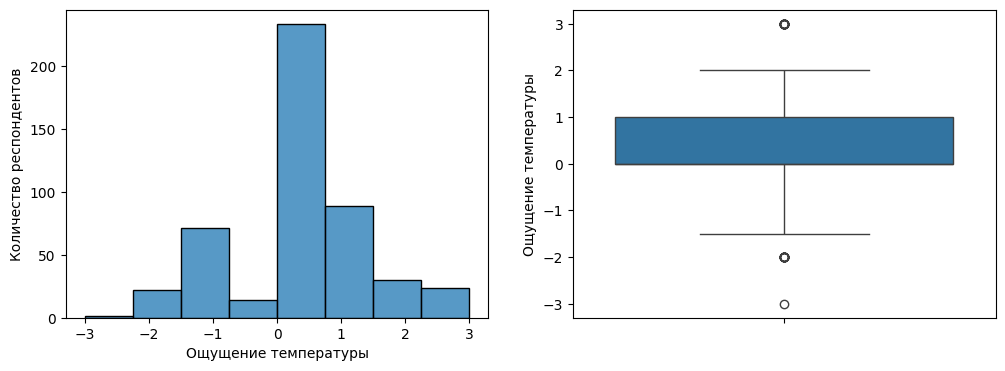

In [131]:
# Выделяем пространство и задаем размеры диаграмм
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Изображаем гистограмму
sns.histplot(df, bins=8, x='ощущение_температуры', ax=axes[0])

# Подписываем оси
axes[0].set_xlabel('Ощущение температуры')
axes[0].set_ylabel('Количество респондентов')

# Изображаем ящик с усами
sns.boxplot(df['ощущение_температуры'], ax=axes[1])

# Подписываем оси
axes[1].set_ylabel('Ощущение температуры')

# Вывод
plt.show()

Из графического анализа видно, что данные в обоих шкалах распределены нормально, следовательно, используем корреляцию Пирсона.

In [132]:
# Переводим данные в массив
rh = df['rh'].to_numpy()
temperature = df['ощущение_температуры'].to_numpy()

# Считаем коэффициент корреляции и p-value
stat, p_value = pearsonr(rh, temperature)

# Вывод
float(stat), float(p_value)

(0.06665326992103937, 0.14313686529258307)

По полученным данным можно сделать вывод, что нулевая гипотеза верна и ощущение температуры никак не связано с относительной влажностью.

---



**Дополнительная гипотеза 2: Люди себя ощущают комфортнее, когда в помещении теплее/холоднее?**

H₀: Температура в помещении никак не влияет на оценку комфорта.

H₁: Чем теплее/холоднее в помещении, тем более комфортно себя ощущают люди.

In [133]:
# Рассмотрим два этих признака и определим типы шкал
df[['оценка_комфорта', 'температура_воздуха_в_помещении']]

,оценка_комфорта,температура_воздуха_в_помещении
0,3.5,22.900000
1,6.0,31.423611
2,5.0,25.600000
3,2.5,24.200000
4,4.5,23.800000
...,...,...
479,5.0,31.600000
480,5.0,26.500000
481,5.0,26.900000
482,5.0,26.900000


Замечаем, что обе шкалы количественные, проверим их на нормальность:

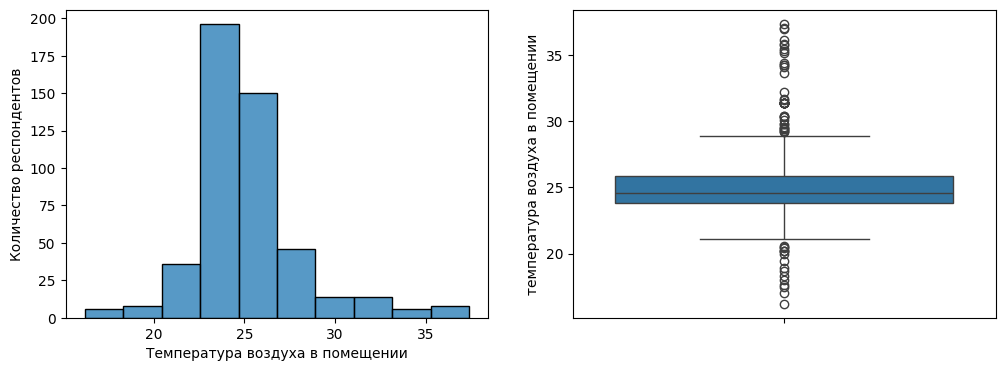

In [134]:
# Выделяем пространство и задаем размеры диаграмм
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Изображаем гистограмму
sns.histplot(df, bins=10, x='температура_воздуха_в_помещении', ax=axes[0])

# Подписываем оси
axes[0].set_xlabel('Температура воздуха в помещении')
axes[0].set_ylabel('Количество респондентов')

# Изображаем ящик с усами
sns.boxplot(df['температура_воздуха_в_помещении'], ax=axes[1])

# Подписываем оси
axes[1].set_ylabel('температура воздуха в помещении')

# Вывод
plt.show()

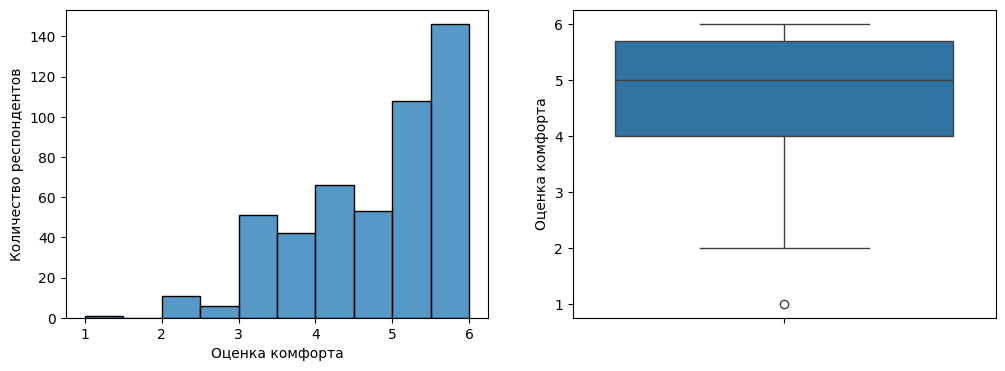

In [135]:
# Выделяем пространство и задаем размеры диаграмм
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Изображаем гистограмму
sns.histplot(df, bins=10, x='оценка_комфорта', ax=axes[0])

# Подписываем оси
axes[0].set_xlabel('Оценка комфорта')
axes[0].set_ylabel('Количество респондентов')

# Изображаем ящик с усами
sns.boxplot(df['оценка_комфорта'], ax=axes[1])

# Подписываем оси
axes[1].set_ylabel('Оценка комфорта')

# Вывод
plt.show()

Из графического анализа видно, что шкала оценки комфорта имеет ненормальное распределение, поэтому используем корреляцию Спирмена.

In [136]:
# Переводим данные в массив
temperature = df['температура_воздуха_в_помещении'].to_numpy()
comfort = df['оценка_комфорта'].to_numpy()

# Считаем коэффициент корреляции и p-value
stat, p_value = pearsonr(temperature, comfort)

# Вывод
float(stat), float(p_value)

(-0.0938148223212399, 0.03909919634531147)

При текущем уровне доверия (0.05) считаем верной альтернативную гипотезу. Люди чувствуют себя чуть комфортнее при температурах ниже средних, но коэффициент корреляции очень мал, связь слишком слабая, чтобы делать выводы на её основе.

---



**Дополнительная гипотеза 3: С уменьшением температуры на улице в офисе становится холоднее?**

H₀: Температура на улице не влияет на офисную, климатическое оборудование компенсирует разницу.

H₁: С уменьшением/увеличением температуры на улице температура в офисе меняется в том же направлении, климатическое оборудование не способно полностью компенсировать разницу.

In [137]:
# Рассмотрим два этих признака и определим типы шкал
df[['среднемесячная_температура_на_улице', 'температура_воздуха_в_помещении']]

,среднемесячная_температура_на_улице,температура_воздуха_в_помещении
0,28.900000,22.900000
1,43.031944,31.423611
2,32.800000,25.600000
3,28.900000,24.200000
4,32.800000,23.800000
...,...,...
479,30.900000,31.600000
480,30.800000,26.500000
481,21.600000,26.900000
482,21.600000,26.900000


Замечаем, что обе шкалы количественные, проверим их на нормальность:

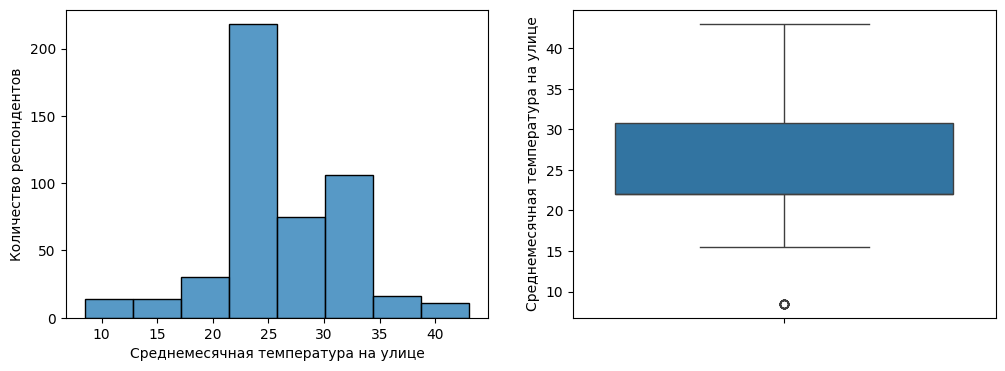

In [138]:
# Выделяем пространство и задаем размеры диаграмм
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Изображаем гистограмму
sns.histplot(df, bins=8, x='среднемесячная_температура_на_улице', ax=axes[0])

# Подписываем оси
axes[0].set_xlabel('Среднемесячная температура на улице')
axes[0].set_ylabel('Количество респондентов')

# Изображаем ящик с усами
sns.boxplot(df['среднемесячная_температура_на_улице'], ax=axes[1])

# Подписываем оси
axes[1].set_ylabel('Среднемесячная температура на улице')

# Вывод
plt.show()

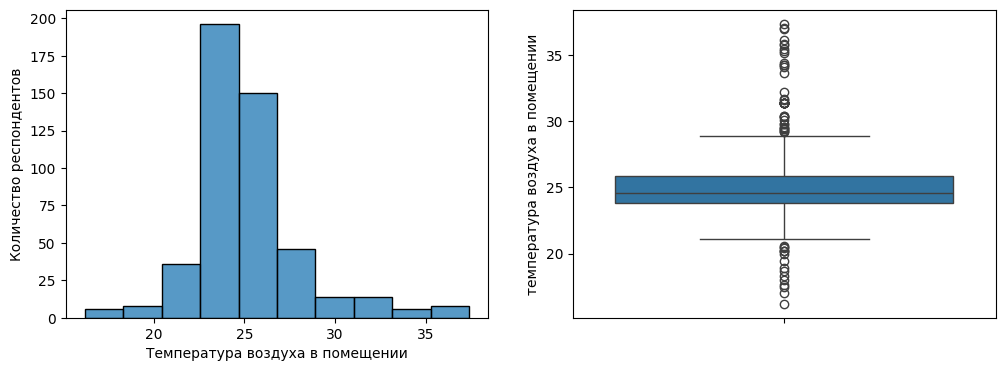

In [139]:
# Выделяем пространство и задаем размеры диаграмм
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Изображаем гистограмму
sns.histplot(df, bins=10, x='температура_воздуха_в_помещении', ax=axes[0])

# Подписываем оси
axes[0].set_xlabel('Температура воздуха в помещении')
axes[0].set_ylabel('Количество респондентов')

# Изображаем ящик с усами
sns.boxplot(df['температура_воздуха_в_помещении'], ax=axes[1])

# Подписываем оси
axes[1].set_ylabel('температура воздуха в помещении')

# Вывод
plt.show()

Из графического анализа видно, что данные в обоих шкалах распределены нормально, следовательно, используем корреляцию Пирсона.

In [140]:
# Переводим данные в массив
temperature_out = df['среднемесячная_температура_на_улице'].to_numpy()
temperature_in = df['температура_воздуха_в_помещении'].to_numpy()

# Считаем коэффициент корреляции и p-value
stat, p_value = pearsonr(temperature_out, temperature_in)

# Вывод
float(stat), float(p_value)

(0.4774764161113186, 6.255002227014616e-29)

По полученным данным мы однозначно принимаем альтернативную гипотезу, коэффициент корреляции показывает, что связь умеренная, следовательно, с уменьшением среднемесячной температуры на улице в офисе становится холоднее и наоборот. Значит пока что температура улицы достаточно ощутимо влияет на офисную и нельзя однозначно сказать, что климатическое оборудование справляется с влиянием улицы.

# Итоги

В ходе работы был проведён полный цикл анализа данных, включающий предобработку, аналитический и графический анализ, проведение расчётов и исследований, регрессионное моделирование и проверку статистических гипотез.

На этапе подготовки данных были обработаны пропущенные значения, скорректированы типы данных и устранены аномальные наблюдения, что позволило обеспечить корректность последующего анализа.

Проведённые аналитический и графический анализы показали всю информацию по интересующим нас признакам в виде различных показателей и графиков, что дало возможность сделать более качественные и обоснованные выводы.  

В расчетах и исследованиях мы делили данные на различные группы и считали для них статистические показатели по основным признакам.
Также мы построили корреляционную матрицу и сделали на ее основе выводы о взаимосвязи различных признаков нашего датасета.

В разделе регрессионного моделирования мы отобрали интересующие нас факторы, которые могут влиять на температуру в помещении, преобразовали номинальные отобранные колонки в количественные и построили модель линейной регрессии по предсказанию температуры в помещении и оценили её качество по ключевым метрикам.

В разделе гипотез мы выдвинули и проверили гипотезы, рассчитали критерии и выявили несколько интересных зависимостей, на основе которых были составлены графики в дашборде и которые приблизили нас к ответу на вопрос заказчика.

Подводя итоги, можно сказать, что проделана большая работа по анализу данных предоставленного датасета, были применены методы для очистки и преобразования данных для повышения их качества, использованы как аналитические, так и графические инструменты, рассчитаны различные критерии для проверки гипотез и также была построена модель линейной регрессии с оценкой ее качества с помощью метрик. Мы применили практически все инструменты анализа, которые изучили на курсе и тем самым окончательно закрепили понимание процесса анализа данных.
